In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

strat_pkg = 'IDE'

mpl_finance_path = '/content/drive/My Drive/Colab Notebooks/JnQ/mpl_finance'

if mpl_finance_path not in sys.path:

  try:
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/{}'.format(strat_pkg))
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/funcs')
    sys.path.insert(0, mpl_finance_path)
    
  except Exception as e:
    print(e)

Mounted at /content/drive


# requirements

In [3]:
# !pip install findiff

# import nvstrings, nvcategory, cudf
# import cuml
# import cudf

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs.funcs_idep import *
from funcs.funcs_duration_v2 import *
from funcs.funcs_plot_check import *
from funcs.funcs_pairing import *
# from funcs.funcs_ide import *
# from funcs.funcs_indicator_candlescore import *
from funcs.funcs_indicator import *
from funcs.funcs_trader import *
import logging
import importlib

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl

import numpy as np
# import jax.numpy as np
import pandas as pd
# import seaborn as sns
# import tensorflow as tf

import pickle
import shutil
import json
from easydict import EasyDict

# from trendln import trendln

from datetime import datetime
import random
import time
# import warnings

# warnings.simplefilter("ignore", category=RuntimeWarning)

np.seterr(invalid="ignore")
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=2000) 

pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# makeset - with to_htf dataframes

## sync_check_make

In [ ]:
def sync_check_make(df):

    make_itv_list = ['3T', '5T', '15T', '30T', 'H', '4H', 'D']
    offset_list = ['1h', '1h', '1h', '1h', '1h', '1h', '9h']

    assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        
    htf_df_list = [to_htf(df, itv_=itv_, offset=offset_) for itv_, offset_ in zip(make_itv_list, offset_list)]

    df_3T, df_5T, df_15T, df_30T, df_H, df_4H, df_D = htf_df_list

    for htf_df in htf_df_list:
      print("{} -> ".format(pd.infer_freq(htf_df.index)), htf_df.tail(1))

    # return

    #           supertrend          #
    # # print(df.head(100))
    # # return
    
    df = st_price_line(df, df_3T, '3m')
    # df = st_price_line(df, df_5T, '5m')
    # df = st_price_line(df, df_15T, '15m')
    # df = st_price_line(df, df_30T, '30m')
    # df = st_price_line(df, df_H, '1h')
    # df = st_price_line(df, df_4H, '4h')

    print("supertrend phase done")

    # --------------- rsi --------------- #  
    # df['rsi_1m'] = rsi(df, 14)    
    # df_5T['rsi_5m'] = rsi(df_5T, 14)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['rsi_5m']))
    
    # print("rsi phase done")


    # --------------- cci --------------- #  
    # df['cci_1m'] = cci(df, 20)

    # print("cci phase done")


    # --------------- ema --------------- #      
    # df_5T['ema_5m'] = ema(df_5T['close'], 195)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['ema_5m']))
    
    # print("ema phase done")


    # # --------------- dc --------------- #  
    # df = dc_line(df, None, '1m', dc_period=20)
    # df = dc_line(df, df_3T, '3m', dc_period=20)
    # df = dc_line(df, df_5T, '5m', dc_period=20)
    # df = dc_line(df, df_15T, '15m', dc_period=20)
    # df = dc_line(df, df_30T, '30m', dc_period=20)
    # df = dc_line(df, df_H, '1h', dc_period=20)
    # df = dc_line(df, df_4H, '4h', dc_period=20)
    # df = dc_line(df, df_D, '1d', dc_period=20)

    # print("dc phase done")
    
    # # --------------- bband --------------- #  
    # df = bb_line(df, None, '1m')
    # df = bb_line(df, df_3T, '3m')
    # df = bb_line(df, df_5T, '5m')
    # df = bb_line(df, df_15T, '15m')
    # df = bb_line(df, df_30T, '30m')
    # df = bb_line(df, df_H, '1h')
    # df = bb_line(df, df_4H, '4h')
    # df = bb_line(df, df_D, '1d')

    # print("bband phase done")

    # --------------- cbline --------------- #    
    # df_3T['cloud_bline_3m'] = cloud_bline(df_3T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_3T, [-1]), columns=['cloud_bline_3m']))
    # df_5T['cloud_bline_5m'] = cloud_bline(df_5T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['cloud_bline_5m']))
    # df_15T['cloud_bline_15m'] = cloud_bline(df_15T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_15T, [-1]), columns=['cloud_bline_15m']))
    # df_30T['cloud_bline_30m'] = cloud_bline(df_30T, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_30T, [-1]), columns=['cloud_bline_30m']))
    # df_H['cloud_bline_1h'] = cloud_bline(df_H, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_H, [-1]), columns=['cloud_bline_1h']))
    # df_4H['cloud_bline_4h'] = cloud_bline(df_4H, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_4H, [-1]), columns=['cloud_bline_4h']))

    # print("cbline phase done")
    

    #           lucid sar              #
    # df['sar_1m'], df['sar_uptrend_1m'] = lucid_sar(df, return_uptrend=True)

    # df_3T['sar_3m'], df_3T['sar_uptrend_3m'] = lucid_sar(df_3T, af_initial=0.01, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_3T, [-2, -1], backing_i=1), columns=['sar_3m', 'sar_uptrend_3m']))

    # df_5T['sar_5m'], df_5T['sar_uptrend_5m'] = lucid_sar(df_5T, af_initial=0.01, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-2, -1], backing_i=1), columns=['sar_5m', 'sar_uptrend_5m']))

    # df_15T['sar_15m'], df_15T['sar_uptrend_15m'] = lucid_sar(df_15T, af_initial=0.01, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_15T, [-2, -1], backing_i=1), columns=['sar_15m', 'sar_uptrend_15m']))

    # df_4H['sar_4h'], df_4H['sar_uptrend_4h'] = lucid_sar(df_4H, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_4H, [-2, -1], backing_i=1), columns=['sar_4h', 'sar_uptrend_4h']))
    
    # print("sar phase done")

    
    #           stochastic              #
    # df['stoch_1m'] = stoch(df, 13, 3, 3)

    # df_5T['stoch'] = stoch(df_5T, 13, 3, 3)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1], backing_i=-1), columns=['stoch_5m']))

    # print("stoch phase done")


    return df


## make & save res_df (concat 생각하면, timeindex sync 맞춰야함)

### old (xlsx)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
  # if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_st1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

NameError: ignored

### xlsx to feather

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
  if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    feather_name = key.replace(".xlsx", ".ftr")
    # feather_path = save_path + feather_name

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)


    df.reset_index().to_feather(date_path + feather_name, compression='lz4')
    second_df.reset_index().to_feather(date_path2 + feather_name, compression='lz4')
    third_df.reset_index().to_feather(date_path3 + feather_name, compression='lz4')
    fourth_df.reset_index().to_feather(date_path4 + feather_name, compression='lz4')
    fifth_df.reset_index().to_feather(date_path5 + feather_name, compression='lz4')
    sixth_df.reset_index().to_feather(date_path6 + feather_name, compression='lz4')
    seventh_df.reset_index().to_feather(date_path7 + feather_name, compression='lz4')

    print("xlsx converted to feather !")
    

  0%|          | 0/156 [00:00<?, ?it/s]

DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:04:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:14:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:29:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-09-14 03:59:59.999000', '2021-11-15 14:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-03-10 20:59:59.999000', '2021-11-15 16:59:59.999000'], dtype='datetime64[ns]', freq=None)

xlsx converted to feather !
DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='

### add itv_name to ftr

In [ ]:
save_path = './candlestick_concated/res_df/'

# dir_path = "bbdc3m_backi2"
# date = '2021-10-10'
date = '2021-07-01'

db_path = './candlestick_concated/database_bn/non_cum/%s/' % date
os.makedirs(os.path.join(db_path), exist_ok=True)

# exist_list = os.listdir(os.path.join(save_path, dir_path))
# break


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue
        
    df = shutil.copy(date_path + key, db_path + key.replace(".ftr", "_%s.ftr" % interval))
    second_df = shutil.copy(date_path2 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval2))
    third_df = shutil.copy(date_path3 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval3))
    fourth_df = shutil.copy(date_path4 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval4))
    fifth_df = shutil.copy(date_path5 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval5))
    sixth_df = shutil.copy(date_path6 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval6))
    seventh_df = shutil.copy(date_path7 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval7))

    print("copied to" + db_path + key.replace(".ftr", "_%s.ftr" % interval))


  0%|          | 0/175 [00:00<?, ?it/s]

copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 BTCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 BCHUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 XRPUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 EOSUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 LTCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ETCUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 LINKUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 XLMUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ADAUSDT_1m.ftr
copied to./candlestick_concated/database_bn/non_cum/2021-07-01/2021-07-01 ETHUSDT_1m.ftr


### feather ver.

In [ ]:
# db_path = './candlestick_concated/database_ub/' # upbit
db_path = './candlestick_concated/database_bn/'   # binance


save_path = './candlestick_concated/res_df/'
save_dir_path = "st3m_backi2"

date = '2022-01-10'

cum_path = "cum"
# cum_path = "non_cum"  # non_cum 으로 진행하는 경우, row concat 용도이기 때문에 noncat -> concat 으로 변경 (base cols 를 모두 담고 있음)

concat_path = 'noncat' # 새로운 cols 를 기존 cum/concat 에 붙이려는 경우
# concat_path = 'concat'

data_path = os.path.join(db_path, cum_path, date)
save_path = os.path.join(save_path, save_dir_path, concat_path, cum_path, date)

os.makedirs(save_path, exist_ok=True)

file_list = os.listdir(data_path)
exist_list = os.listdir(save_path)
# break

a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue

    if "_1m" not in key:
      continue

    # feather_name = key.replace(".ftr", "_%.ftr" % save_dir_path)
    feather_name = key.replace("_1m", "")
    feather_path = os.path.join(save_path, feather_name)

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    df = pd.read_feather(os.path.join(data_path, key), columns=None, use_threads=True).set_index("index")

    res_df = sync_check_make(df)

    res_df.reset_index().to_feather(feather_path, compression='lz4')
    print(feather_path, "saved succesfully !")

  0%|          | 0/7 [00:00<?, ?it/s]

3T ->                          open     high      low    close
index                                                  
2022-01-10 15:18:00  3163.02  3164.29  3162.41  3164.28
5T ->                          open     high      low    close
index                                                  
2022-01-10 15:15:00  3160.51  3164.29  3159.01  3164.28
15T ->                          open     high      low    close
index                                                  
2022-01-10 15:15:00  3160.51  3164.29  3159.01  3164.28
30T ->                         open     high      low    close
index                                                 
2022-01-10 15:00:00  3171.7  3173.11  3156.02  3164.28
H ->                         open     high      low    close
index                                                 
2022-01-10 15:00:00  3171.7  3173.11  3156.02  3164.28
4H ->                         open     high      low    close
index                                                 
2022-01-10 13

### htf candle check

In [ ]:
itv_list = ['3T', '5T', '15T', '30T', '1H', '4H']
comp_df_list = [second_df, third_df, fourth_df, fifth_df, sixth_df, seventh_df]
offset_list = ['1h', '2min', '2min', '2min', '2min', '2min']
# itv_list = ['4H']
# comp_df_list = [seventh_df]

slice_len = 100
for itv_, comp_df_, offset in zip(itv_list, comp_df_list, offset_list):

  print("itv_ :", itv_)

  # df = h_candle_v2(df, '3T')
  # end_ts = 
  h_res_df = df.resample(itv_, offset=offset).agg({
          'open': 'first',
          'high': 'max',
          'low': 'min',
          'close': 'last'
      })

  #   앞은 길이가 다르고, 뒤에서부터 잘라서 비교    #
  #   last_row 빼고는 동일, 4h 제외
  # print(df.tail())
  print(h_res_df.tail())
  print(comp_df_.tail())
  # # print(h_res_df.head())
  # # print(second_df.head())

  # print(len(h_res_df))
  # print(len(second_df))

  # print(h_res_df.values[-slice_len:])
  # print(second_df.iloc[:, :4].values[-slice_len:])
  # print(np.argwhere(h_res_df.values[-slice_len:] != comp_df_.iloc[:, :4].values[-slice_len:]))
  # print()
  break

itv_ : 3T
                        open     high      low    close
index                                                  
2022-01-10 15:06:00  3169.97  3170.22  3159.51  3161.22
2022-01-10 15:09:00  3161.22  3163.98  3161.22  3163.82
2022-01-10 15:12:00  3163.82  3163.83  3156.02  3160.49
2022-01-10 15:15:00  3160.51  3164.29  3159.01  3162.93
2022-01-10 15:18:00  3163.02  3164.29  3162.41  3164.28
                            open     high      low    close    volume
index                                                                
2022-01-10 15:08:59.999  3169.97  3170.22  3159.51  3161.22  4241.449
2022-01-10 15:11:59.999  3161.22  3163.98  3161.22  3163.82  1143.874
2022-01-10 15:14:59.999  3163.82  3163.83  3156.02  3160.49  2135.292
2022-01-10 15:17:59.999  3160.51  3164.29  3159.01  3162.93  1011.598
2022-01-10 15:20:59.999  3163.02  3164.29  3162.41  3163.82   466.868


## concat & save new res_df

### old (xlsx)

In [ ]:
save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

print(dict_name, "loaded !")
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

base_postfix = '_bb15m_backi2.xlsx'
new_postfix = '_st1h_backi2.xlsx'

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if new_postfix not in key:
    continue

  # if key in 

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_excel(save_path + key, index_col=0)  

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  droped_new_res_df.head()
  # break

  # res_df_dict[key] = res_df
  res_df_dict[key] = droped_new_res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


### new col to latest feather (1m_indi. only)

In [ ]:
save_path = './candlestick_concated/res_df/'

cum_dir = "cum"

new_dir_path = "rsi_backi2"
base_dir_path = "bbdc3m_backi2"

new_date = '2021-11-17'



#     load ftr list    #
base_save_path = os.path.join(save_path, base_dir_path, "concat/cum", new_date)
new_save_path = base_save_path.replace(base_dir_path, new_dir_path)

#     save to (new) cum dir    #
#      1. if dir. not exists, makedir
os.makedirs(new_save_path, exist_ok=True)

ftr_list = [s for s in os.listdir(base_save_path) if "ftr" in s]
print(ftr_list)
# break


max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if new_date not in key:
    continue


  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_save_path, key), columns=None, use_threads=True).set_index("index")
  # print(base_df.head())
  # print(res_df.head())
  # break

  droped_new_res_df = sync_check(base_df)

  # new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # # new_res_df.head()

  # intersection_cols = res_df.columns.intersection(base_df.columns)

  # droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(new_save_path, key), compression='lz4')

  print(os.path.join(new_save_path, key), "saved !")

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### feather ver. (col concat)

In [ ]:
new_dir_path = "st3m_backi2"
base_dir_path = "bb1d_backi2"

# new_date = "2021-11-17"
new_date = "2022-01-10"

#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = './candlestick_concated/res_df/'
save_path = os.path.join(save_path, new_dir_path, "concat/cum", new_date)   
# save_path = os.path.join(save_path, new_dir_path, "concat/non_cum", new_date)   # row col 하려면 concat 맞음, noncum 사용
os.makedirs(save_path, exist_ok=True)


#     load ftr list    #
# ftr_list = [s for s in os.listdir(os.path.join(save_path, new_dir_path)) if "ftr" in s]

noncat_path = save_path.replace("concat/", "noncat/")
ftr_list = [s for s in os.listdir(noncat_path) if "ftr" in s]
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:
    continue

  try:

    #       read from base postfix's directory    #
    base_df = pd.read_feather(os.path.join(save_path.replace(new_dir_path, base_dir_path), key), columns=None, use_threads=True).set_index("index")
    res_df = pd.read_feather(os.path.join(noncat_path, key), columns=None, use_threads=True).set_index("index")

    # print(base_df.head())
    # print(res_df.head())
    # break

    new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
    # new_res_df.head()

    droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
    # droped_new_res_df.head()
    # break

    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df
    print(os.path.join(save_path, key), "saved !")
  
  except Exception as e:
    print("error occured ! :", e)
  

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


['2022-01-10 ETHUSDT.ftr']
./candlestick_concated/res_df/st3m_backi2/concat/cum/2022-01-10/2022-01-10 ETHUSDT.ftr saved !


In [ ]:
print(*droped_new_res_df.columns, sep = '\n')

### feather ver. (row concat) , database cum 도 호환가능

In [ ]:
save_path = './candlestick_concated/res_df/'        # cols 추가된 cum db 에 new_row's cols 기준으로 합치는 경우
save_path = './candlestick_concated/database_bn/'   # ohlcv cum db 만들 경우

base_date = '2022-01-10'
new_date = '2022-02-17'

#     load ftr list    #
if "database" in save_path:
  base_dir_path = ""
  new_dir_path = ""
  concat_dir = ""
else:
  base_dir_path = "sar_backi2"
  new_dir_path = "bb4h_backi2"  # dir_path 가 base / new 서로 달라질 수 있어서 분할함
  concat_dir = "concat"

base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "cum", base_date)      # 기존 cum db 와 new_date db 를 cum 진행
# base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "non_cum", base_date)    # non_cum db 와 new_date db 를 cum 진행

# new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "cum", new_date)      # 상황별로 직접 선택해야할 듯
new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "non_cum", new_date)



#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = new_date_path.replace("non_cum", "cum")   # non_cum 아니여도 무관
os.makedirs(save_path, exist_ok=True)   # noncat / concat 두가지 경우 존재가능할 것
# os.makedirs(os.path.join(save_path, dir_path, "noncat/cum", new_date), exist_ok=True)


ftr_list = [s for s in os.listdir(new_date_path) if "ftr" in s]
exist_list = os.listdir(save_path)
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:   # date rejection
    continue
  if '1m' not in key:  # itv rejection
    continue

  # if key in exist_list:
  #   print(key, "already exist !")
  #   continue

  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_date_path, key.replace(new_date, base_date)), columns=None, use_threads=True).set_index("index")   # key 에 new_date 담겨있음
  res_df = pd.read_feather(os.path.join(new_date_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # new_res_df.head()

  intersection_cols = res_df.columns.intersection(base_df.columns)

  droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break  
  
  print(droped_new_res_df.iloc[[0, -1]])  

  # ------------- verify df continuity directly itv by itv ------------- #
  true_continue = True
  if "_" in key:

    interval = key.split(".")[0].split("_")[-1] 
    itv_num = to_itvnum(interval)

    # verified_df = consecutive_df(droped_new_res_df, to_itvnum(interval))
    # verified_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df  

    np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))
    ideal_ts_gap = 60 * itv_num

    for ts_i in range(len(np_idx_ts)):
      
      if ts_i != 0:
        ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

        if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
        # if ts_gap == ideal_ts_gap:
          print(droped_new_res_df.index[ts_i - 1])
          print(droped_new_res_df.index[ts_i])
          # print(ts_gap)
          print("------------------ unideal ts_gap ------------------")
          true_continue = False

    print("continuity checked !")

  if true_continue:
    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

  print(os.path.join(save_path, key), "saved !")
  


['2022-02-17 ETHUSDT_1m.ftr']
                            open     high     low    close  volume
index                                                             
2019-11-27 16:45:59.999   146.00   146.00   146.0   146.00   0.010
2022-02-17 10:29:59.999  3146.86  3147.22  3146.4  3146.76  26.727
continuity checked !
./candlestick_concated/database_bn/cum/2022-02-17/2022-02-17 ETHUSDT_1m.ftr saved !


### check continuity

In [ ]:
# print(droped_new_res_df.columns)

print(droped_new_res_df.iloc[[0, -1]])

np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))

print(np_idx_ts[:10])
for ts_i in range(len(np_idx_ts)):
  
  if ts_i != 0:
    ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

    if ts_gap > 60 or ts_gap < 60:

      print("invalid ts_gap found !")
    # if ts_gap == 60:
      print(droped_new_res_df.index[ts_i - 1])
      print(droped_new_res_df.index[ts_i])
      # print(ts_gap)
      print()


                             open    high       low     close   volume
index                                                                 
2020-09-14 16:00:59.999    3.2002    4.91    3.2002    3.2745  11567.0
2022-02-04 23:57:59.999  103.7500  103.75  103.6000  103.6000   6427.0
[1.60009926e+09 1.60009932e+09 1.60009938e+09 1.60009944e+09
 1.60009950e+09 1.60009956e+09 1.60009962e+09 1.60009968e+09
 1.60009974e+09 1.60009980e+09]


### check length of front missing value + middle_data non_missing validity

In [ ]:
#       1. new_date 의 시작 timeidx 와 base_date end timeidx 의 최소 days' gap     #
#       2. new_date 의 시작 부분 indi. value 는 np.nan 으로 채워질 거기 때문에 계산해야함    #

df_count = droped_new_res_df.count()
len_missing = df_count.max() - df_count.min()
print(len_missing / 1440)

#       3. 
missing_sliced_df = droped_new_res_df.iloc[len_missing:]
df_count2 = missing_sliced_df.count()
# print(df_count2)
print((df_count2.max() - df_count2.min()))    # this value should be zero !


2.167361111111111
38


In [ ]:
# df_count2.index[df_count2.argmin()]
# missing_sliced_df.head(5)

stay_missed = np.sum(pd.isnull(missing_sliced_df), axis=0)
print(stay_missed)

In [ ]:
stay_missed_cols = stay_missed[stay_missed != 0].index

for sm_col in stay_missed_cols:
  
  row_idx = np.argwhere(pd.isnull(missing_sliced_df[sm_col].values))

  plt.figure(figsize=(3,3))
  plt.plot(row_idx)
  plt.ylim(0, len(missing_sliced_df))
  plt.title(sm_col)

  plt.show()


## legacy

### mv files

In [ ]:
df_path = './candlestick_concated/survey_df_v2'
files_ = os.listdir(df_path)

In [ ]:
dirs = [file_ for file_ in files_ if not file_.endswith('.ftr')]
files = [file_ for file_ in files_ if file_.endswith('.ftr')]

In [ ]:
dirs

['2022-01-10 ETHUSDT', '2022-01-10 ETHUSDT_all', '2022-02-04 SOLUSDT']

In [ ]:
def move_fn(dir_, file_):
  src_path = os.path.join(df_path, file_)
  dst_path = os.path.join(df_path, dir_, file_)
  shutil.move(src_path, dst_path)
  print("moved to {}".format(dst_path))

_ = [move_fn('2022-01-10 ETHUSDT_all', file_) for file_ in files if 'eth'.upper() in file_]
# sols


### load data (old)

In [ ]:
interval = '1m'
date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

interval6 = '1h'
date_path6 = './candlestick_concated/%s/quant_v2/' % interval6
file_list6 = os.listdir(date_path6)
print((file_list6))

interval7 = '4h'
date_path7 = './candlestick_concated/%s/quant_v2/' % interval7
file_list7 = os.listdir(date_path7)
print((file_list7))

interval8 = '1d'
date_path8 = './candlestick_concated/%s/quant_v2/' % interval8
file_list8 = os.listdir(date_path8)
print((file_list8))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 SUSHIUSDT.xlsx', '2021-06-30 CVCUSDT.xlsx', '2021-06-30 BTSUSDT.xlsx', '2021-06-30 HOTUSDT.xlsx', '2021-06-30 ZRXUSDT.xlsx', '2021-06-30 QTUMUSDT.xlsx', '2021-06-30 IOTAUSDT.xlsx', '2021-06-30 BTCBUSD.xlsx', '2021-06-30 WAVESUSDT.xlsx', '2021-06-30 LITUSDT.xlsx', '2021-06-30 XTZUSDT.xlsx', '2021-06-30 BNBUSDT.xlsx', '2021-06-30 AKROUSDT.xlsx', '2021-06-30 HNTUSD

## cudf

In [ ]:
# !conda install -c rapidsai-nightly -c nvidia -c numba -c conda-forge \
#     cudf python=3.7 cudatoolkit=11.1 -t=$nb_path

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: -t=/content/notebooks


In [ ]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.


In [ ]:
import shutil
import sys

colab_env = "/usr/lib"

rapids_path = os.path.join(current_path, "rapidsai-csp-utils/lib")
rapids_libs = os.listdir(rapids_path)
print(rapids_libs)
# break

for lib_ in rapids_libs:
  try:
    shutil.copy(os.path.join(rapids_path, lib_), os.path.join(colab_env, lib_))
    sys.path.append(os.path.join(colab_env, lib_))
    print("copied to" + os.path.join(colab_env, lib_))
  except Exception as e:
    print(e)

## move legacy files

In [ ]:
# print()
cur_dir_list = os.listdir('.')
for f in cur_dir_list:
  if 'legacy' in f :
    # print(f)
    if os.path.isdir(current_path + f,):
      continue

    shutil.move(current_path + f, current_path + 'legacy/' + f)
    print("moved to" + current_path + 'legacy/' +  f)

# IDE platform


## load ftr_list

In [4]:
save_path = './candlestick_concated/res_df/'

dir_path = "bb4h_backi2"
dir_path = "bb1d_backi2"
date = "2022-01-10"
date = "2022-02-17"

ftr_path = os.path.join(save_path, dir_path, "concat/cum", date)

# ------ load ftr list ------ #
ftr_list = [s for s in os.listdir(ftr_path) if "ftr" in s if date in s]
# ftr_list = [s for s in os.listdir(os.path.join(save_path, dir_path)) if "ftr" in s if date in s]
print(ftr_list)

start_0 = time.time()
key = ftr_list[0]  # tempoaray use single key
res_df_ = pd.read_feather(os.path.join(ftr_path, key), columns=None, use_threads=True).set_index("index")
# print(res_df_.head())
print(key, "loaded !")
print("load res_df_ elapsed time :", time.time() - start_0)

['2022-02-17 ETHUSDT.ftr']
2022-02-17 ETHUSDT.ftr loaded !
load res_df_ elapsed time : 6.670742034912109


### calc recursive indi's min_period

In [ ]:
ticker_prcn = get_precision_by_price(res_df.close.iloc[-1]) + 2

target_len = 300000
slice_len_list = list(range(50, 10000, 100))
slice_len_list.insert(0, target_len)

start_0 = time.time()
# prev_int_, prev_pnts_ = None, None
offset = 1

for sl_idx, sample_len in enumerate(slice_len_list):

  sample_df = res_df.iloc[-sample_len -offset:-offset]
  sample_len2 = sample_len

  # --------- input using indi.s --------- #
  # res = ema_v0(sample_df['close'], 190)
  res = rsi(sample_df, 14)

    #    to_htf()    #
  # df_5T = to_htf(sample_df, itv_='5T', offset='1h')
  # sample_len2 = len(df_5T)

  # # --------- input using htf_indi. --------- #
  # res = ema(df_5T['close'], 195)
  # -------------------------------------- #

  res_last_row = res.iloc[-1]
  if pd.isnull(res_last_row):
    continue

  # print(res_last_row)
  # break

  # sample_df = sample_df.join(to_lower_tf_v2(sample_df, df_5T, [-1]), how='inner')


  #   자리수 분할 계산    #
  int_, points_ = str(res_last_row).split('.')
  pnts_ = points_[:ticker_prcn]

  if sl_idx == 0:
    target_int_ = int_
    target_pnts_ = pnts_
    print("target {} ({}) -> {} {}".format(sample_len, sample_len2, int_, points_))

  else:
    if target_int_ == int_ and target_pnts_ == pnts_:
      # print(sample_len, "({})".format(sample_len2), '->', int_, pnts_, end='\n\n')
      print("{} ({}) -> {} {}\n".format(sample_len, sample_len2, int_, points_))
      break

print(time.time() - start_0)  # (1301)(1361)(1301)

NameError: ignored

## import utils & config

In [5]:
frame_ver = "0114_htf"
ID_arr = np.array(['v3', 'v5_2'])

utils_public_name = "{}.utils.{}_utils_public".format(strat_pkg, frame_ver)
utils_public_lib = importlib.import_module(utils_public_name)
utils_public = utils_public_lib   # temporary

u_name_list = ["{}.utils.{}_utils_{}".format(strat_pkg, frame_ver, id_) for id_ in ID_arr]
utils_arr = np.array([importlib.import_module(u_name) for u_name in u_name_list])

config_name_list = ["{}_config_{}.json".format(frame_ver, id_) for id_ in ID_arr]
cfg_path_list = [os.path.join(current_path, strat_pkg, "config", name_) for name_ in config_name_list]
cfg_file_list = [open(cfg_path) for cfg_path in cfg_path_list]
config_arr = np.array([EasyDict(json.load(cfg_)) for cfg_ in cfg_file_list])

# ------ opened files should be closed --> 닫지 않으면 reopen 시 error occurs ------ #
_ = [cfg_.close() for cfg_ in cfg_file_list]
show_plot = 1   # idep's var - do not touch

### utils_

In [16]:
# from funcs.funcs_indicator_candlescore import *
# import numpy as np


def enlist_rtc(res_df, config, np_timeidx):
    strat_version = config.strat_version
    
    res_df['short_rtc_1_{}'.format(strat_version)] = res_df['bb_lower_%s' % config.loc_set.point.outg_itv1]
    res_df['short_rtc_0_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.point.outg_itv0]

    res_df['long_rtc_1_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.point.outg_itv1]
    res_df['long_rtc_0_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.outg_itv0]

    # ------ inversion ------ #
    if config.pos_set.short_inversion or config.pos_set.long_inversion:  # Todo - 추후 다른 변수로 변경해야함 (entry_score deprecated)
        short_rtc_1_copy = res_df['short_rtc_1_{}'.format(strat_version)].copy()
        res_df['short_rtc_1_{}'.format(strat_version)] = res_df['long_rtc_1_{}'.format(strat_version)]
        res_df['long_rtc_1_{}'.format(strat_version)] = short_rtc_1_copy

        short_rtc_0_copy = res_df['short_rtc_0_{}'.format(strat_version)].copy()
        res_df['short_rtc_0_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)]
        res_df['long_rtc_0_{}'.format(strat_version)] = short_rtc_0_copy

    res_df['short_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['short_rtc_0_{}'.format(strat_version)] - res_df['short_rtc_1_{}'.format(strat_version)])
    res_df['long_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['long_rtc_1_{}'.format(strat_version)] - res_df['long_rtc_0_{}'.format(strat_version)])

    res_df['h_short_rtc_1_{}'.format(strat_version)] = res_df['bb_lower_%s' % config.loc_set.point.tpg_itv1]
    # res_df['h_short_rtc_1_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.tpg_itv]
    res_df['h_short_rtc_0_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.point.tpg_itv0]

    res_df['h_long_rtc_1_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.point.tpg_itv1]
    # res_df['h_long_rtc_1_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.point.tpg_itv]
    res_df['h_long_rtc_0_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.point.tpg_itv0]

    # ------ inversion ------ #
    if config.pos_set.short_inversion or config.pos_set.long_inversion:
        h_short_rtc_1_copy = res_df['h_short_rtc_1_{}'.format(strat_version)].copy()
        res_df['h_short_rtc_1_{}'.format(strat_version)] = res_df['h_long_rtc_1_{}'.format(strat_version)]
        res_df['h_long_rtc_1_{}'.format(strat_version)] = h_short_rtc_1_copy

        h_short_rtc_0_copy = res_df['h_short_rtc_0_{}'.format(strat_version)].copy()
        res_df['h_short_rtc_0_{}'.format(strat_version)] = res_df['h_long_rtc_0_{}'.format(strat_version)]
        res_df['h_long_rtc_0_{}'.format(strat_version)] = h_short_rtc_0_copy

    res_df['h_short_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['h_short_rtc_0_{}'.format(strat_version)] - res_df['h_short_rtc_1_{}'.format(strat_version)])
    res_df['h_long_rtc_gap_{}'.format(strat_version)] = abs(
        res_df['h_long_rtc_1_{}'.format(strat_version)] - res_df['h_long_rtc_0_{}'.format(strat_version)])

    res_df['short_dtk_1_{}'.format(strat_version)] = res_df['bb_lower_%s' % config.loc_set.zone.dtk_itv]
    res_df['short_dtk_0_{}'.format(strat_version)] = res_df['dc_upper_%s' % config.loc_set.zone.dtk_itv]

    res_df['long_dtk_1_{}'.format(strat_version)] = res_df['bb_upper_%s' % config.loc_set.zone.dtk_itv]
    res_df['long_dtk_0_{}'.format(strat_version)] = res_df['dc_lower_%s' % config.loc_set.zone.dtk_itv]

    res_df['short_dtk_gap_{}'.format(strat_version)] = abs(
        res_df['short_dtk_0_{}'.format(strat_version)] - res_df['short_dtk_1_{}'.format(strat_version)])
    res_df['long_dtk_gap_{}'.format(strat_version)] = abs(
        res_df['long_dtk_1_{}'.format(strat_version)] - res_df['long_dtk_0_{}'.format(strat_version)])

    return res_df


def enlist_tr(res_df, config, np_timeidx, mode='OPEN'):
    strat_version = config.strat_version
    # ---------------- get open_res ---------------- #    
    len_df = len(res_df)
    short_open_res = np.ones(len_df)
    long_open_res = np.ones(len_df)
    
    data_cols = ['open', 'close', 'bb_lower_%s' % config.loc_set.point.exp_itv, 'bb_upper_%s' % config.loc_set.point.exp_itv]   # Todo - public_indi 이전에 해야할지도 모름
    o, c, bb_lower_, bb_upper_ = [res_df[col_].to_numpy() for col_ in data_cols]
    back_c = res_df['close'].shift(config.loc_set.point.tf_entry).to_numpy()

    # short_open_res *= (o >= bb_lower_) &(c < bb_lower_)                        
    # short_open_res *= (back_c >= bb_lower_) &(bb_lower_ > c)
    short_open_res *= np_timeidx % (config.loc_set.point.tf_entry * 3) == (config.loc_set.point.tf_entry * 3 - 1)
    res_df['short_open_{}'.format(strat_version)] = short_open_res

    # long_open_res *= (o <= bb_upper_) &(c > bb_upper_)                     
    # long_open_res *= (back_c <= bb_upper_) &(bb_upper_ < c)                     
    long_open_res *= np_timeidx % (config.loc_set.point.tf_entry * 3) == (config.loc_set.point.tf_entry * 3 - 1)    
    res_df['long_open_{}'.format(strat_version)] = long_open_res

    # ---------------- set ep level ---------------- #
    # -------- limit ver. -------- #
    if config.ep_set.entry_type == "LIMIT":
      res_df['short_ep_{}'.format(strat_version)] = res_df['h_short_rtc_1_{}'.format(strat_version)] + res_df['h_short_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap
      res_df['long_ep_{}'.format(strat_version)] = res_df['h_long_rtc_1_{}'.format(strat_version)] - res_df['h_long_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap

      # res_df['short_ep_{}'.format(strat_version)] = res_df['close'] + res_df['h_short_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap
      # res_df['long_ep_{}'.format(strat_version)] = res_df['close'] - res_df['h_long_rtc_gap_{}'.format(strat_version)] * config.tr_set.ep_gap       

    # -------- market ver. -------- #
    else:
        res_df['short_ep_{}'.format(strat_version)] = res_df['close']
        res_df['long_ep_{}'.format(strat_version)] = res_df['close']

    # -------- zoned_ep -------- #
    if config.tr_set.c_ep_gap != "None":
        # res_df['short_ep_org_{}'.format(strat_version)] = res_df['short_ep_{}'.format(strat_version)].copy()
        # res_df['long_ep_org_{}'.format(strat_version)] = res_df['long_ep_{}'.format(strat_version)].copy()
        res_df['short_ep2_{}'.format(strat_version)] = res_df['h_short_rtc_1_{}'.format(strat_version)] + res_df[
            'h_short_rtc_gap_{}'.format(strat_version)] * config.tr_set.c_ep_gap
        res_df['long_ep2_{}'.format(strat_version)] = res_df['h_long_rtc_1_{}'.format(strat_version)] - res_df[
            'h_long_rtc_gap_{}'.format(strat_version)] * config.tr_set.c_ep_gap

    # --------------- tp --------------- #
    res_df['short_tp_{}'.format(strat_version)] = res_df['h_short_rtc_1_{}'.format(strat_version)] - res_df[
        'h_short_rtc_gap_{}'.format(strat_version)] * config.tr_set.tp_gap
    res_df['long_tp_{}'.format(strat_version)] = res_df['h_long_rtc_1_{}'.format(strat_version)] + res_df[
        'h_long_rtc_gap_{}'.format(strat_version)] * config.tr_set.tp_gap

    # --------------- out --------------- #
    if config.loc_set.point.outg_dc_period != "None":  # out 만 영향 줄려고 tp 까지 해놓고, rtc_0 변경 
        res_df['short_rtc_0_{}'.format(strat_version)] = res_df['high'].rolling(config.loc_set.point.outg_dc_period).max()
        res_df['long_rtc_0_{}'.format(strat_version)] = res_df['low'].rolling(config.loc_set.point.outg_dc_period).min()

    res_df['short_out_{}'.format(strat_version)] = res_df['short_rtc_0_{}'.format(strat_version)] + res_df[
        'short_rtc_gap_{}'.format(strat_version)] * config.tr_set.out_gap
    res_df['long_out_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)] - res_df[
        'long_rtc_gap_{}'.format(strat_version)] * config.tr_set.out_gap

    # -------- zoned_out -------- #
    if config.tr_set.t_out_gap != "None":
        # res_df['short_out_org_{}'.format(strat_version)] = res_df['short_out_{}'.format(strat_version)].copy()
        # res_df['long_out_org_{}'.format(strat_version)] = res_df['long_out_{}'.format(strat_version)].copy()
        res_df['short_out2_{}'.format(strat_version)] = res_df['short_rtc_0_{}'.format(strat_version)] + res_df[
            'short_rtc_gap_{}'.format(strat_version)] * config.tr_set.t_out_gap
        res_df['long_out2_{}'.format(strat_version)] = res_df['long_rtc_0_{}'.format(strat_version)] - res_df[
            'long_rtc_gap_{}'.format(strat_version)] * config.tr_set.t_out_gap

        
    return res_df


### utils_public

In [32]:
# from funcs.funcs_indicator import *
# from funcs.funcs_trader import *
# import logging
# from ast import literal_eval

sys_log = logging.getLogger()


class OrderSide:
    BUY = "BUY"
    SELL = "SELL"
    INVALID = None


def lvrg_set(res_df, config, open_side, ep_, out_, fee, limit_leverage=50):
    strat_version = config.strat_version
    if not pd.isnull(out_) and not config.lvrg_set.static_lvrg:
        if open_side == OrderSide.SELL:
            if strat_version in ['v3']:
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / (out_ / ep_ - 1 - (fee + config.trader_set.market_fee))
                config.lvrg_set.leverage = config.lvrg_set.target_pct / (
                        out_ / ep_ - 1 - (fee + config.trader_set.market_fee))
                #     zone 에 따른 c_ep_gap 를 고려 (loss 완화 방향) / 윗 줄은 수익 극대화 방향
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / (out_ / res_df['short_ep_org'].iloc[ep_j] - 1 - (fee + config.trader_set.market_fee))
            elif strat_version in ['v5_2', 'v7_3']:
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
                config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(
                    ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(res_df['short_ep_org'].iloc[ep_j] / out_ - 1 - (fee + config.trader_set.market_fee))
        else:
            #   윗 phase 는 min_pr 의 오차가 커짐
            if strat_version in ['v3']:
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / (ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
                config.lvrg_set.leverage = config.lvrg_set.target_pct / (
                        ep_ / out_ - 1 - (fee + config.trader_set.market_fee))
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / (res_df['long_ep_org'].iloc[ep_j] / out_ - 1 - (fee + config.trader_set.market_fee))
            elif strat_version in ['v5_2', 'v7_3']:
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(out_ / ep_ - 1 - (fee + config.trader_set.market_fee))
                config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(
                    out_ / ep_ - 1 - (fee + config.trader_set.market_fee))
                # config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(out_ / res_df['long_ep_org'].iloc[ep_j] - 1 - (fee + config.trader_set.market_fee))

    if not config.lvrg_set.allow_float:
        config.lvrg_set.leverage = int(config.lvrg_set.leverage)

    # ------------ leverage rejection ------------ #
    #       Todo - return None ? -> 1 (일단 임시로 수정함)
    if config.lvrg_set.leverage < 1 and config.lvrg_set.lvrg_rejection:
        return 1
    config.lvrg_set.leverage = min(limit_leverage, max(config.lvrg_set.leverage, 1))

    return config.lvrg_set.leverage


def sync_check(df_, config, order_side="OPEN", row_slice=True):
    try:
        make_itv_list = [m_itv.replace('m', 'T') for m_itv in literal_eval(config.trader_set.itv_list)]
        row_list = literal_eval(config.trader_set.row_list)
        rec_row_list = literal_eval(config.trader_set.rec_row_list)
        offset_list = literal_eval(config.trader_set.offset_list)

        assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        htf_df_list = [to_htf(df_, itv_=itv_, offset=offset_) for itv_idx, (itv_, offset_)
                       in enumerate(zip(make_itv_list, offset_list)) if itv_idx != 0]  #
        htf_df_list.insert(0, df_)

        # for htf_df_ in htf_df_list:
        #     print(htf_df_.tail())

        #       Todo        #
        #        1. row_list calc.
        #           a. indi. 를 만들기 위한 최소 period 가 존재하고, 그 indi. 를 사용한 lb_period 가 존재함
        #           b. => default_period + lb_period
        #               i. from sync_check, public_indi, ep_point2, ep_dur 의 tf 별 max lb_period check
        #                   1. default_period + max lb_period check
        #                       a. 현재까지 lb_period_list
        #                           h_prev_idx (open / close) 60
        #                           dc_period 135
        #                           zone_dc_period 135

        # --------- slicing (in trader phase only) --------- #
        #               --> latency 영향도가 높은 곳은 이곳
        if row_slice:   # recursive 가 아닌 indi. 의 latency 를 고려한 slicing
            df, df_5T, df_15T, df_30T, df_4H = [df_s.iloc[-row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
            rec_df, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_4H = [df_s.iloc[-rec_row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
        else:
            df, df_5T, df_15T, df_30T, df_4H = htf_df_list
            rec_df, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_4H = htf_df_list

        # --------- add indi. --------- #

        #        1. 필요한 indi. 는 enlist_epouttp & mr_check 보면서 삽입
        #        2. min use_rows 계산을 위해서, tf 별로 gathering 함        #
        start_0 = time.time()

        df = dc_line(df, None, '1m', dc_period=20)
        df = bb_line(df, None, '1m')
        # print(df.tail())

        df = dc_line(df, df_5T, '5m')
        df = bb_line(df, df_5T, '5m')

        df = dc_line(df, df_15T, '15m')
        df = bb_line(df, df_15T, '15m')

        df = bb_line(df, df_30T, '30m')

        # print(time.time() - start_0)

        # start_0 = time.time()
        df = bb_line(df, df_4H, '4h')
        # print(time.time() - start_0)

        rec_df['rsi_1m'] = rsi(rec_df, 14)  # Todo - recursive, 250 period
        df = df.join(to_lower_tf_v2(df, rec_df.iloc[:, [-1]], [-1], backing_i=0), how='inner')  # <-- join same_tf manual
        # print(df.rsi_1m.tail())

        if order_side in ["OPEN"]:
            rec_df_5T['ema_5m'] = ema(rec_df_5T['close'], 195)  # Todo - recursive, 1100 period (5T)
            df = df.join(to_lower_tf_v2(df, rec_df_5T, [-1]), how='inner')

    except Exception as e:
        sys_log.error("error in sync_check :", e)
    else:
        return df


def public_indi(res_df, config, np_timeidx, order_side="OPEN"):

    strat_version = config.strat_version
    res_df = dc_level(res_df, '5m', 1)
    res_df = bb_level(res_df, '5m', 1)
    # res_df = st_level(res_df, '5m', 1)

    res_df = dc_level(res_df, '15m', 1)
    res_df = bb_level(res_df, '15m', 1)
    res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    # res_df = st_level(res_df, '15m', 1)

    # res_df = dc_level(res_df, '30m', 1)
    # res_df = bb_level(res_df, '30m', 1)
    # res_df = st_level(res_df, '30m', 1)

    # res_df = bb_level(res_df, '1h', 1)

    res_df = bb_level(res_df, '4h', 1)

    res_df['dc_upper_v2'.format(strat_version)] = res_df['high'].rolling(config.loc_set.zone.dc_period).max()
    res_df['dc_lower_v2'.format(strat_version)] = res_df['low'].rolling(config.loc_set.zone.dc_period).min()

    res_df['zone_dc_upper_v2'.format(strat_version)] = res_df['high'].rolling(config.loc_set.zone.zone_dc_period).max()
    res_df['zone_dc_lower_v2'.format(strat_version)] = res_df['low'].rolling(config.loc_set.zone.zone_dc_period).min()

    if order_side in ["OPEN"]:
        start_0 = time.time()

        res_df["wick_score"], res_df['body_score'] = candle_score(res_df, unsigned=False)

        # print("~ wick_score() elapsed time : {}".format(time.time() - start_0))

        start_0 = time.time()

        res_df = h_candle_v2(res_df, '15T')
        res_df = h_candle_v2(res_df, 'H')

        # sys_log.warning("~ h_wick_score elapsed time : {}".format(time.time() - start_0))
        # print("wick_score() ~ h_candle() elapsed time : {}".format(time.time() - start_0))

        hc_itv = 'H'
        h_candle_col = ['hopen_{}'.format(hc_itv), 'hhigh_{}'.format(hc_itv), 'hlow_{}'.format(hc_itv),
                        'hclose_{}'.format(hc_itv)]

        res_df['h_wick_score'], res_df['h_body_score'] = candle_score(res_df, ohlc_col=h_candle_col, unsigned=False)

    #     temp indi.    #
    # res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
    # res_df["ma60_1m"] = res_df['close'].rolling(60).mean()
    # res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    return res_df


def ep_loc_point2(res_df, config, i, out_j, side=OrderSide.SELL):
  allow_ep_in = 0
  if config.strat_version in ['v5_2']:
    if side == OrderSide.SELL:            
      if (res_df['dc_upper_1m'].iloc[i - 1] <= res_df['dc_upper_15m'].iloc[i]) & \
              (res_df['dc_upper_15m'].iloc[i - 1] != res_df['dc_upper_15m'].iloc[i]):
        allow_ep_in = 1
    else:
      if (res_df['dc_lower_1m'].iloc[i - 1] >= res_df['dc_lower_15m'].iloc[i]) & \
              (res_df['dc_lower_15m'].iloc[i - 1] != res_df['dc_lower_15m'].iloc[i]):
        allow_ep_in = 1

  if allow_ep_in:
    out_j = i
  return allow_ep_in, out_j


# vectorized calc.
def ep_loc_v2(res_df, config, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL):
    strat_version = config.strat_version

    # ------- param init ------- #
    open_side = None
    len_df = len(res_df)
    mr_res = np.ones(len_df)
    zone_arr = np.full(len_df, 'n')

    # ------ process 한번에 처리해서 param_check 만 ver. 별로 하면 될 것 ------ #
    #     => public_indi() 가 될 것
    #     1. 사용한 param 정보와 matching 된 data 병렬로 나열 logging 될 것
    #     2. binarize 할 것 => short 와 long 은 같은 조건식 사용할 수 있게됨 - 보류 (생각보다 상반된 조건식이 많음)
    #       a. 조건식이 다른 경우는 ?
    tp_fee, out_fee = calc_tp_out_fee(config)

    # -------------- candle_score -------------- #
    if config.loc_set.point.wick_score != "None":
      # -------------- candle_score_v0 (1m initial tick 기준임)  -------------- #
      if strat_version in ['v5_2', '1_1']:
        wick_score = res_df['wick_score'].to_numpy()
        if ep_loc_side == OrderSide.SELL:
          mr_res *= wick_score <= -config.loc_set.point.wick_score
        else:
          mr_res *= wick_score >= config.loc_set.point.wick_score

    # -------------- spread scheduling -------------- #
    if config.loc_set.zone.short_spread != "None":
      bb_base_5m = res_df['bb_base_5m'].to_numpy()  # to_numpy() 는 ep_loc 에서 진행됨
      bb_lower_5m = res_df['bb_lower_5m'].to_numpy()
      bb_upper_5m = res_df['bb_upper_5m'].to_numpy()
      dc_lower_5m = res_df['dc_lower_5m'].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= (bb_base_5m - bb_lower_5m - tp_fee * bb_base_5m) / (bb_base_5m - bb_lower_5m + out_fee * bb_base_5m) >= config.loc_set.zone.short_spread
      else:
        # mr_res *= (bb_base_5m - dc_lower_5m - tp_fee * bb_upper_5m) / (bb_base_5m - dc_lower_5m + out_fee * bb_base_5m) >= config.loc_set.zone.long_spread
        mr_res *= (bb_upper_5m - dc_lower_5m - tp_fee * bb_upper_5m) / (bb_upper_5m - dc_lower_5m + out_fee * bb_upper_5m) >= config.loc_set.zone.long_spread

    # -------------- dtk -------------- #
    if config.loc_set.zone.dt_k != "None":
        # ------ dc_v2 ------ #
      dc_lower_v2 = res_df['dc_lower_v2'.format(strat_version)].to_numpy()
      short_dtk_1_ = res_df['short_dtk_1_{}'.format(strat_version)].to_numpy() - \
              res_df['short_dtk_gap_{}'.format(strat_version)].to_numpy() * config.loc_set.zone.dt_k
      dc_upper_v2 = res_df['dc_upper_v2'.format(strat_version)].to_numpy()
      long_dtk_1_ = res_df['long_dtk_1_{}'.format(strat_version)].to_numpy() + \
              res_df['long_dtk_gap_{}'.format(strat_version)].to_numpy() * config.loc_set.zone.dt_k
      if ep_loc_side == OrderSide.SELL:
        mr_res *= dc_lower_v2 >= short_dtk_1_
      else:
        mr_res *= dc_upper_v2 <= long_dtk_1_

    # -------------- zone rejection  -------------- #
    if config.loc_set.zone.zone_rejection:
        #       config 로 통제할 수 없는 rejection 은 strat_version 으로 조건문을 나눔 (lvrg_set 과 동일)
        # ------------ envel. ------------ #
        # ep_loc check 기준 idx 가 entry 기준이라는 걸 명심
        if strat_version in ['v3_2']:
          hc_itv = '15T'
          dc_itv = '15m'
          shift_num = [0, to_itvnum(hc_itv)]
          div_res = [1, 0]
          for itv_num, res in zip(shift_num, div_res):
            hclose_H = res_df['hclose_{}'.format(hc_itv)].shift(itv_num).to_numpy()  # close_bar timein 사용하는 경우, 특수로 shift(0) 사용가능
            if ep_loc_side == OrderSide.SELL:
              dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
              mr_res *= (hclose_H < dc_lower_) == res
            else:
              dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
              mr_res *= (hclose_H > dc_upper_) == res

        if strat_version in ['v3_1']:
          hc_itv = 'H'
          dc_itv = '15m'
          itv_num = to_itvnum(hc_itv)
          hclose_H = res_df['hclose_{}'.format(hc_itv)].shift(itv_num).to_numpy()   # 따라서 future_data 사용시, shifting 필요함
          if ep_loc_side == OrderSide.SELL:
            dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
            mr_res *= hclose_H < dc_lower_
          else:
            dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
            mr_res *= hclose_H > dc_upper_

        # ------------ bb ------------ #
        # ------ bb & close ------ #
        close = res_df['close'].to_numpy()

        if strat_version in ['v5_2']:
          bb_upper2_ = res_df['bb_upper2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
          bb_lower2_ = res_df['bb_lower2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
          if ep_loc_side == OrderSide.SELL:
            mr_res *= bb_upper2_ < close
          else:
            mr_res *= bb_lower2_ > close

        # ------ close, bb & ema ------ #
        if strat_version in ['v5_2']: # 'v3'
          ema_5m = res_df['ema_5m'].to_numpy()
          if ep_loc_side == OrderSide.SELL:
            mr_res *= close < ema_5m
          else:
            mr_res *= close > ema_5m

    # -------------- zoned tr_set - post_work -------------- #
    if config.tr_set.c_ep_gap != "None" or config.tr_set.t_out_gap != "None":
        #       by zone_dtk       #
        #         c_zone        #
        zone_dc_upper_v2_ = res_df['zone_dc_upper_v2'.format(strat_version)].to_numpy()
        long_dtk_plot_1 = res_df['long_dtk_plot_1'].to_numpy() + res_df['long_dtk_plot_gap'].to_numpy() * config.loc_set.zone.zone_dt_k
        zone_dc_lower_v2_ = res_df['zone_dc_lower_v2'.format(strat_version)].to_numpy()
        short_dtk_plot_1 = res_df['short_dtk_plot_1'].to_numpy() - res_df['short_dtk_plot_gap'].to_numpy() * config.loc_set.zone.zone_dt_k
        if ep_loc_side == OrderSide.SELL:
          zone_res = zone_dc_upper_v2_ > long_dtk_plot_1  # mr_res 와는 별개임
          pos = 'short'
        else:
          zone_res = zone_dc_lower_v2_ < short_dtk_plot_1
          pos = 'long'

        # static 여부에 따른 vectorized adj. - dynamic 은 vectorize 불가
        if config.ep_set.static_ep and config.tr_set.c_ep_gap != "None":
          res_df['{}_ep_{}'.format(pos, strat_version)][zone_res] = res_df['{}_ep2_{}'.format(pos, strat_version)][zone_res]
        if config.out_set.static_out and config.tr_set.t_out_gap != "None":
          res_df['{}_out_{}'.format(pos, strat_version)][~zone_res] = res_df['{}_out2_{}'.format(pos, strat_version)][~zone_res]  # t_zone 에 대한 out2 setting 
        zone_arr = np.where(zone_res == 1, 'c', 't')

    return mr_res, zone_arr  # mr_res 의 True idx 가 open signal

### set config (override available)

In [10]:
#     caution : MARKET / LIMIT spelling   #
#      json doesn't support single quotes     #

param_dict = \
{
  "strat_version": "v3_2",
  "trader_set": {
    "run": 1,
    "df_log": 0,
    "open_index": -1,
    "complete_index": -2,
    "limit_fee": 0.0002,
    "market_fee": 0.0004,
    "initial_asset": 3500,
    "asset_changed": 0,
    "symbol": "ETHUSDT",
    "symbol_changed": 0,
    "itv_list": "['1m', '5m', '15m', '30m', '4h']",
    "row_list": "[200, 160, 30, 25, 25]",
    "rec_row_list": "[250, 1100, 1, 1, 1]",
    "offset_list": "['1h', '1h', '1h', '1h', '1h']",
    "rsi_out_stratver": [
      "v7_3",
      "1_1"
    ],
    "bar_close_second": 59,
    "realtime_term": 0.01,
    "api_retry_term": 3,
    "check_entry_sec": 10,
    "entry_execution_wait": 60,
    "breakout_qty_ratio": 0.97,
    "qty_check_term": 30,
    "exit_execution_wait": 60,
    "close_complete_term": 5,
    "save_stacked_df": 0,
    "stacked_df_exist": 1
  },
  "pos_set": {
    "short_inversion": 0,
    "long_inversion": 0,
    "short_ban": 1,
    "long_ban": 0
  },
  "loc_set": {
    "zone": {
      "short_spread": "None",
      "long_spread": "None",
      "tr_thresh": "None",
      "dtk_dc_itv": "None",
      "dtk_itv": "5m",
      "dt_k": "None",
      "dc_period": 135,
      "ei_k": 0.36,
      "use_dtk_line": 0,
      "zone_rejection": 1,
      "gap_mply": 1,
      "c_itv_ticks": 60,
      "ad_idx": 19,
      "bbz_itv": "None",
      "zone_dt_k": 0.4,
      "zone_dc_period": 135,
      "dr_error": 0.1,
      "bbwp_thresh": 0.5,
      "entry_incycle": 5,
      "max_eplim_pct": 0.05,
      "min_eplim_pct": 0.013
    },
    "point": {
      "exp_itv": "5m",
      "tpg_itv1": "5m",
      "tpg_itv0": "5m",
      "outg_itv1": "5m",
      "outg_itv0": "1m",
      "outg_dc_period": "None",
      "tf_entry": 15,
      "wick_score": "None",
      "body_score": "None",
      "wick_score2": "None",
      "body_score2": "None",
      "osc_band": 20
    },
    "point2": {
      "ce_gap": 0.5
    }
  },
  "tr_set": {
    "ep_gap": 0.083,
    "tp_gap": 0.36,
    "decay_gap": "None",
    "out_gap": -0.5,
    "c_ep_gap": 0.232,
    "t_out_gap": "None"
  },
  "ep_set": {
    "entry_type": "MARKET",
    "static_ep": 1,
    "tpout_onexec": 0
  },
  "tp_set": {
    "non_tp": 0,
    "tp_type": "MARKET",
    "static_tp": 1,
    "decay_term": 60,
    "time_tp": 1,
    "partial_num": 1,
    "partial_qty_divider": 1.5
  },
  "out_set": {
    "out_type": "MARKET",
    "use_out": 0,
    "static_out": 1,
    "hl_out": 1,
    "price_restoration": 0,
    "retouch": 0,
    "retouch_out_period": 500,
    "second_out": 0,
    "approval_st_gap": 1.5,
    "second_out_gap": 0.5
  },
  "lvrg_set": {
    "leverage": 2,
    "static_lvrg": 1,
    "allow_float": 0,
    "target_pct": 0.12,
    "lvrg_rejection": 0
  }
}

config = EasyDict(param_dict)
# param_json = json.dumps(param_dict, indent=2)

#### save config

In [ ]:
config_name = "config_v5_2.1220_candlejson"
# config_name = "config_v3.json"
cfg_full_path = os.path.join(current_path, "config", config_name)


with open(cfg_full_path, 'w') as cfg:
    json.dump(config1, cfg, indent=2)
    print("{} dumped !".format(cfg_full_path))

/content/drive/My Drive/Colab Notebooks/JnQ/config/config_v5_2.1220_candlejson dumped !


## run

In [13]:
id_idx_list = [0]  # ID_arr 에서 import 할 id_idx 선택
public_override = 1
utils_override = 1
config_override = 1

# ------ config_list 와 같은 org_var 에 override 하는거 다시 생각하기 ------ #
ID_list = ID_arr[id_idx_list]
utils_list = utils_arr[id_idx_list]
config_list = config_arr[id_idx_list]

if config_override or utils_override:
  assert len(config_list) == 1
  if config_override:
    config_list[0] = config
    ID_list[0] = config.strat_version
  
config = config_list[0]  # base config = config_list[0]

tp_fee, out_fee = calc_tp_out_fee(config)   # -> rev_pr 때문에 일단 이곳에도 선언함

# ------- inversion set ------- #
inversion = 0
fdist_thresh = 1

# ------- plot param ------- #
show_detail = 0

# ------- temp param ------- #
allow_osc_touch = 0
rsi_gap = 5

early_out_tpg = 0.36

# ------- survey param ------- #
itv_num_list = [1, 3, 5, 15]

itv_list = ['15m', '30m', '1h', '4h']
# itv_list = ['3m', '5m', '15m', '30m', '1h', '4h']

# x_val_list = np.arange(, 2.0, 0.1)     # prcn 1
x_val_list = np.arange(-0.69, -0.8, -0.01)  # prcn 2
# x_val_list = np.arange(-0.695, -0.75, -0.005)    # prcn 3
# x_val_list = np.arange(0.944, 0.945, 0.0001)    # prcn 4
# x_val_list = np.arange(1, 10, 1)   # prcn -1
x_val_list = np.arange(200, 180, -5)   # prcn -2

y_val_cols = ["wr", "sr", "frq", "dpf", "acc_pr", "sum_pr", "acc_mdd", "sum_mdd", "liqd", "min_pr", "tr", "dr"]
y_rev_val_cols = ["wr", "sr", "acc_pr", "sum_pr", "acc_mdd", "sum_mdd", "min_pr"]

# ['strat_version', 'pos_set', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']
_ = [print(json.dumps(config[key_], indent=1), end=' ') for key_ in ['strat_version', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']]

"v3_2" {
 "zone": {
  "short_spread": "None",
  "long_spread": "None",
  "tr_thresh": "None",
  "dtk_dc_itv": "None",
  "dtk_itv": "5m",
  "dt_k": "None",
  "dc_period": 135,
  "ei_k": 0.36,
  "use_dtk_line": 0,
  "zone_rejection": 1,
  "gap_mply": 1,
  "c_itv_ticks": 60,
  "ad_idx": 19,
  "bbz_itv": "None",
  "zone_dt_k": 0.4,
  "zone_dc_period": 135,
  "dr_error": 0.1,
  "bbwp_thresh": 0.5,
  "entry_incycle": 5,
  "max_eplim_pct": 0.05,
  "min_eplim_pct": 0.013
 },
 "point": {
  "exp_itv": "5m",
  "tpg_itv1": "5m",
  "tpg_itv0": "5m",
  "outg_itv1": "5m",
  "outg_itv0": "1m",
  "outg_dc_period": "None",
  "tf_entry": 15,
  "wick_score": "None",
  "body_score": "None",
  "wick_score2": "None",
  "body_score2": "None",
  "osc_band": 20
 },
 "point2": {
  "ce_gap": 0.5
 }
} {
 "ep_gap": 0.083,
 "tp_gap": 0.36,
 "decay_gap": "None",
 "out_gap": -0.5,
 "c_ep_gap": 0.232,
 "t_out_gap": "None"
} {
 "entry_type": "MARKET",
 "static_ep": 1,
 "tpout_onexec": 0
} {
 "non_tp": 0,
 "tp_type": "MA

In [17]:
# ------ slicing res_df ------ #
res_df = res_df_.loc[pd.to_datetime("2020-09-05 00:00:59.999"):] # pd.to_datetime("2022-01-10 00:00:59.999"), pd.to_datetime("2021-10-04 02:39:59.999000")

np_timeidx = np.array([intmin_np(date_) for date_ in res_df.index.to_numpy()])

start_0 = time.time()
if public_override:
    res_df = public_indi(res_df, config, np_timeidx)  # 현재 대부분의 시간은 h_candle 에서 소비되고 있음
else:
    res_df = utils_public.public_indi(res_df, config, np_timeidx)
print("public_indi elapsed time :", time.time() - start_0)

# ------------ entlist rtc & tr 은 중복되는 여부에 따라 user 가 flexible coding 해야할 것 ------------ #
if utils_override:   # 현재, utils_override 하는 경우 1개의 ID 만 허용함 
  start_0 = time.time()
  res_df = enlist_rtc(res_df, config, np_timeidx)
  print("enlist_rtc elapsed time :", time.time() - start_0)
  start_0 = time.time()
  res_df = enlist_tr(res_df, config, np_timeidx)    
  print("enlist_tr elapsed time :", time.time() - start_0)
else:
    start_0 = time.time()
    for utils_, config_ in zip(utils_list, config_list):
        res_df = utils_.enlist_rtc(res_df, config_, np_timeidx)
        res_df = utils_.enlist_tr(res_df, config_, np_timeidx)
    print("elapsed time :", time.time() - start_0)

public_indi elapsed time : 1.6525249481201172
enlist_rtc elapsed time : 0.04748940467834473
enlist_tr elapsed time : 0.055884599685668945


### ep_loc mr_res

In [33]:
start_0 = time.time()
# ------ get mr_res, zone_arr ------ #
short_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL) for config_ in config_list])
long_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.BUY) for config_ in config_list])
short_open_idx_list = [np.where(res_df['short_open_{}'.format(id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, short_mr_res_obj[:, 0].astype(np.float64))]  # zip 으로 zone (str) 과 묶어서 dtype 변경됨
long_open_idx_list = [np.where(res_df['long_open_{}'.format(id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, long_mr_res_obj[:, 0].astype(np.float64))]

# ------ open_info_arr ------ #
short_side_list = [np.full(len(list_), OrderSide.SELL) for list_ in short_open_idx_list]
long_side_list = [np.full(len(list_), OrderSide.BUY) for list_ in long_open_idx_list]

short_zone_list = [zone_res[short_open_idx] for zone_res, short_open_idx in zip(short_mr_res_obj[:, 1], short_open_idx_list)]
long_zone_list = [zone_res[long_open_idx] for zone_res, long_open_idx in zip(long_mr_res_obj[:, 1], long_open_idx_list)]

short_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, short_open_idx_list)]
long_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, long_open_idx_list)]

selected_id_idx = np.arange(len(id_idx_list))
short_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, short_open_idx_list)]
long_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, long_open_idx_list)]

# ------ get open_info_df ------ #
#   series 만들어서 short / long 끼리 합치고 둘이 합치고, 중복은 우선 순위 정해서 제거
short_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(short_open_idx_list, zip(short_side_list, short_zone_list, short_id_list, short_id_idx_list))]
long_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(long_open_idx_list, zip(long_side_list, long_zone_list, long_id_list, long_id_idx_list))]

open_info_df = pd.concat(short_open_df_list + long_open_df_list)
# ------ sorting + unique ------ #
open_info_df.sort_index(inplace=True)
print(len(open_info_df))
open_info_df[~open_info_df.index.duplicated(keep='first')]  # 먼저 순서를 우선으로 지정
print(len(open_info_df))
# open_info_df.head()

print("elapsed time :", time.time() - start_0)

790
790
elapsed time : 0.9310600757598877


#### main - get paired_res

en_ex_pairing elapsed time : 0.032082557678222656
short_obj.shape : (234, 5)
long_obj.shape : (301, 5)


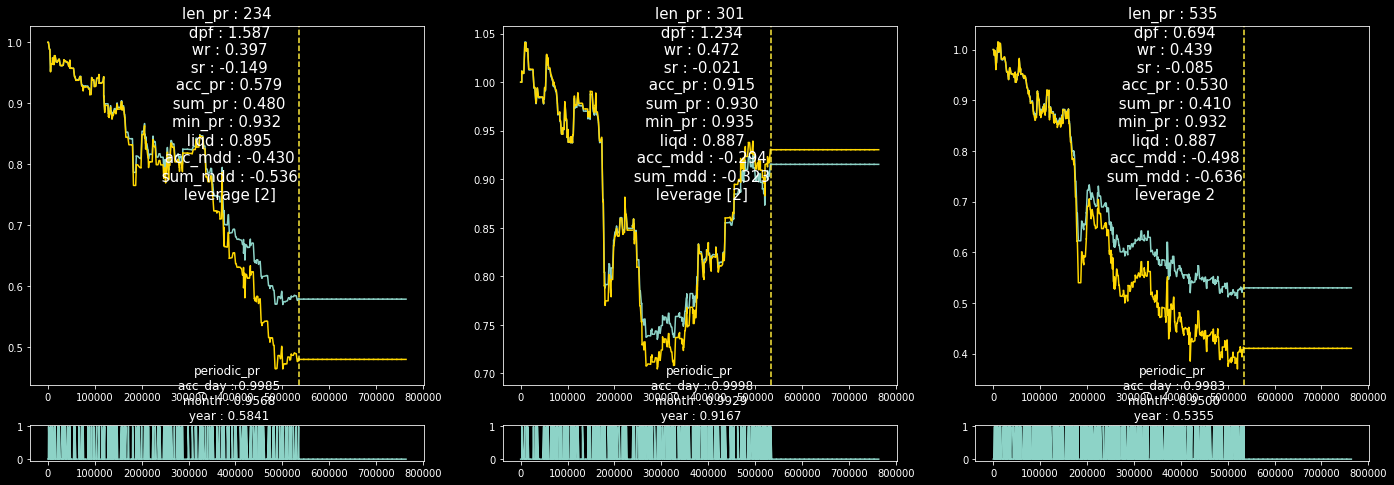

idep_plot_v4 elapsed time : 1.740839958190918


In [42]:
# ------------ public announcement ------------ #
open_idx = open_info_df.index.to_numpy()

test_ratio, plot_is = 0.3, 1
s_idx = (open_idx < int(len(res_df) * (1 - test_ratio))) == plot_is
s_open_info_df = open_info_df[s_idx]
s_open_idx = open_idx[s_idx]

open_info_list = [s_open_info_df[col_].to_numpy() for col_ in s_open_info_df.columns]
side_arr, zone_arr, id_arr, id_idx_arr = open_info_list

data_cols = ['open', 'high', 'low', 'close', 'bb_lower_5m', 'bb_upper_5m', 'rsi_1m']   # Todo - public_indi 이전에 해야할지도 모름
data_list = [res_df[col_].to_numpy() for col_ in data_cols]

h, l = data_list[1:3]
len_df = len(res_df)

# ------------ get paired_res ------------ #
start_0 = time.time()
paired_res = en_ex_pairing(res_df, s_open_idx, open_info_list, data_list, config_list, np_timeidx, [ep_loc_point2, lvrg_set])
# valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr = paired_res
print("en_ex_pairing elapsed time :", time.time() - start_0)  #  0.37 --> 0.3660471439361572 --> 0.21(lesser if)

# ------------ idep_plot ------------ #
start_0 = time.time()
short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr = \
  idep_plot_v4(len_df, h, l, s_open_idx, side_arr, paired_res, inversion=False, sample_ratio=1 - test_ratio)
print("idep_plot_v4 elapsed time :", time.time() - start_0)   # 2.23 s

### check statistical significance

In [ ]:
plt.style.use('dark_background')

title_name_list = [["total", "short", "long"], ["rev_total", "rev_short", "rev_long"]]
survey_dfs_list = [[survey_df, short_survey_df, long_survey_df], [rev_survey_df, rev_short_survey_df, rev_long_survey_df]]
# title_name = 
# survey_df_list = 

space_ = " " * 140

for d_idx, (title_name, survey_dfs) in enumerate(zip(title_name_list, survey_dfs_list)):

  fig = plt.figure(figsize=(30, 10))

  gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                          ncols=3, # col 몇 개 
                          # height_ratios=[1, 1, 1]
                        )

  # gs = fig.add_gridspec(1, 3, wspace=0, hspace=0)

  # nrows, ncols, h_r = 3, 3, [1, 1, 1]
  nrows, ncols, h_r = 3, 4, [1, 1, 1]
  # nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]

  # if d_idx == 0:
  # else:
    # nrows, ncols, h_r = 2, 2, [1, 1]

  for gs_idx, (title, s_df) in enumerate(zip(title_name, survey_dfs)):  


    inner_gs = gs[gs_idx].subgridspec(nrows=nrows, # row 몇 개 
                          ncols=ncols, # col 몇 개 
                          height_ratios=h_r
                        )

    for col_idx, s_cols in enumerate(s_df.columns):
      plt.subplot(inner_gs[col_idx])
      plt.plot(s_df[s_cols])
      plt.title(s_cols)

  # plt.suptitle("total" + " " * 140 + "short" + " " * 140 + "long")
  plt.suptitle(space_.join(title_name))
  plt.show()
  print("\n")

### legacy

#### get paired_res function

In [8]:
def en_ex_pairing(res_df, open_idx, open_info_list, data_list, config_list, np_timeidx, funcs):  # 이미 충분히 줄여놓은 idx 임
    side_arr, zone_arr, id_arr, id_idx_arr = open_info_list
    id_idx_arr = id_idx_arr.astype(int)

    o, h, l, c, bb_lower_5m, bb_upper_5m, rsi_exit = data_list
    ep_loc_point2, lvrg_set = funcs

    valid_openi_list, pair_idx_list, pair_price_list, lvrg_list, fee_list, tpout_list = [[] for li in range(6)]
    len_df = len(res_df)
    len_open_idx = len(open_idx)
    i, open_i = 0, 0  # i for total_res_df indexing

    while 1:
        # ------------ entry phase ------------ #
        # ------ ep_loc ------ #
        op_idx = open_idx[open_i]  # open_i 는 i 와 별개로 운영
        if op_idx < i:  # i = 이전 거래 끝난후의 res_df index, '<' : 거래 종료시점 진입 가능하다는 의미
            open_i += 1
            if open_i >= len_open_idx:
                break
            continue

        #     1. 해당 id 로 config 재할당해야함 - 적정 config 를 뽑아내기 위한 id_idx_arr 도 필요할 것으로 보임
        id_idx = id_idx_arr[open_i]
        config = config_list[id_idx]
        strat_version = config.strat_version
        open_side = side_arr[open_i]

        side_pos = 'short' if open_side == OrderSide.SELL else 'long'
        ep_arr = res_df['{}_ep_{}'.format(side_pos, strat_version)].to_numpy()  # Todo - while loop 내에서 to_numpy() 반복하느니, pd_indexing 이 낫지 않을까
        tp_arr = res_df['{}_tp_{}'.format(side_pos, strat_version)].to_numpy()  # => eptpout arr_list 만들어서 꺼내 사용하면 될 것
        out_arr = res_df['{}_out_{}'.format(side_pos, strat_version)].to_numpy()

        # ------ ei_k & point2 ------ #
        i = op_idx + 1  # open_signal 이 close_bar.shift(1) 이라고 가정하고 다음 bar 부터 체결확인한다는 의미
        if i >= len_df:  # res_df 의 last_index 까지 돌아야함
            break
        exec_j, ep_j, tp_j, out_j, entry_done, ep, fee = check_eik_point2_exec(res_df, config, op_idx, len_df, open_side, [o, h, l, c, ep_arr], ep_loc_point2)
        i = exec_j

        if not entry_done:  # 이 phase 는 exit_phase 뒤에도 있어야할 것 - entry_done var. 사용은 안하겠지만
            open_i += 1  # 확인 끝났으면 조기 이탈(+1), 다음 open_idx 조사 진행
            if open_i >= len_open_idx:
                break
            continue

        # ------ leverage ------ #
        out = out_arr[out_j]
        leverage = lvrg_set(res_df, config, open_side, ep, out, fee)  # res_df 변수 사용됨 - 주석 처리 된 상태일뿐

        exit_done, cross_on = 0, 0
        # ------ cehck tpout_onexec ------ #
        if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
            if config.tp_set.static_tp:
                tp_j = ep_j  # tpout_onexec = using dynamic_ep --> using ep_j 에 대한 이유
            if config.out_set.static_out:
                out_j = ep_j
        while 1:
            # ------------ exit phase ------------ #
            i += 1  # entry 다음 tick 부터 exit 허용
            if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                break

            if not config.tp_set.static_tp:
                tp_j = i
            if not config.out_set.static_out:
                out_j = i

            # ------------ tp ------------ #
            if not config.tp_set.non_tp:
                # ------ limit_tp ------ #
                if config.tp_set.tp_type in ['LIMIT', 'BOTH']:
                    exit_done, tp, fee = check_limit_tp_exec(res_df, config, open_i, i, tp_j, len_df, fee, open_side, exit_done, [o, h, l, c, [tp_arr]])  # 여기서는 j -> i 로 변경해야함
                # ------ market_tp ------ #
                if not exit_done and config.tp_set.tp_type in ['MARKET', 'BOTH']:
                    exit_done, cross_on, tp, fee = check_market_tp_exec(config, open_i, i, len_df, fee, open_side, cross_on, exit_done,
                                                                        [np_timeidx, c, bb_lower_5m, bb_upper_5m, rsi_exit])
            # ------ out ------ #
            if not exit_done and config.out_set.use_out and i != len_df - 1:
                exit_done, tp, fee = check_out(config, open_i, i, out_j, len_df, fee, open_side, exit_done, [o, h, l, c, out_arr])

            if exit_done:  # 이 phase 는 exit_phase 뒤에도 있어야할 것 - entry_done var. 사용은 안하겠지만
                # ------ append dynamic vars. ------ #
                valid_openi_list.append(open_i)  # side, zone, start_ver arr 모두 openi_list 로 접근하기 위해 open_i 를 담음
                pair_idx_list.append([exec_j, i])  # entry & exit (체결 기준임)
                pair_price_list.append([ep, tp])
                lvrg_list.append(leverage)
                fee_list.append(fee)
                tpout_list.append([tp_arr[tp_j], out_arr[out_j]])  # for tpout_line plot_check

                open_i += 1  # 다음 open_idx 조사 진행
                break

        if i >= len_df or open_i >= len_open_idx:  # res_df 의 last_index 까지 돌아야함
            break
        else:
            continue

    return np.array(valid_openi_list), np.array(pair_idx_list), np.array(pair_price_list), np.array(lvrg_list), np.array(fee_list), np.array(tpout_list)


def check_eik_point2_exec(res_df, config, op_idx, len_df, open_side, np_datas, ep_loc_point2):
    o, h, l, c, ep_arr = np_datas
    ep_j = op_idx
    tp_j = op_idx
    out_j = op_idx

    strat_version = config.strat_version
    allow_ep_in = 0 if strat_version in ['v5_2'] else 1
    # allow_ep_in = 0
    entry_done = 0
    entry_open = 0
    ep = None

    if config.ep_set.entry_type == "LIMIT":
        fee = config.trader_set.limit_fee

        for e_j in range(op_idx + 1, len_df):
            # ------ index setting for dynamic options ------ #
            if not config.ep_set.static_ep:
                ep_j = e_j  # dynamic_ep 를 위한 ep_index var.
                out_j = e_j  # dynamic_out 를 위한 out_index var. - 조건식이 static_ep 와 같이 있는 이유 모름 => dynamic_lvrg 로 사료됨

            if not config.tp_set.static_tp:
                tp_j = e_j

            # if short_ep.iloc[initial_i] == np.inf:  #  np.inf caution
            #   break
            # ------ ei_k ------ # - limit 사용하면 default 로 ei_k 가 존재해야함
            #   Todo
            #    1. rtc_1 & gap => numpy 화 안해도 되나
            if open_side == OrderSide.SELL:
                if l[e_j] <= res_df['h_short_rtc_1_{}'.format(strat_version)].iloc[tp_j] - \
                        res_df['h_short_rtc_gap_{}'.format(strat_version)].iloc[tp_j] * config.loc_set.zone.ei_k:
                    break
            else:
                if h[e_j] >= res_df['h_long_rtc_1_{}'.format(strat_version)].iloc[tp_j] + \
                        res_df['h_long_rtc_gap_{}'.format(strat_version)].iloc[tp_j] * config.loc_set.zone.ei_k:
                    break

            # ------ point2 ------ #
            if not allow_ep_in:
                allow_ep_in, out_j = ep_loc_point2(res_df, config, e_j, out_j, side=open_side)

            # ------ check ep_exec ------ #
            if allow_ep_in:
                if open_side == OrderSide.SELL:
                    if h[e_j] >= ep_arr[ep_j]:
                        entry_done = 1
                        if o[e_j] >= ep_arr[ep_j]:
                            ep = o[e_j]
                        else:
                            ep = ep_arr[ep_j]
                        break
                else:
                    if l[e_j] <= ep_arr[ep_j]:
                        entry_done = 1
                        if o[e_j] <= ep_arr[ep_j]:
                            ep = o[e_j]
                        else:
                            ep = ep_arr[ep_j]
                        break

    else:  # market entry
        e_j = op_idx + 1
        entry_done = True
        ep = c[op_idx]
        fee = config.trader_set.market_fee

    return e_j, ep_j, tp_j, out_j, entry_done, ep, fee  # 다음 start_i <-- e_j 로 변경
    #   e_j => 다음 phase 의 시작 index <-> ep_j : ep 의 기준 index
    #   ep_j, tp_j, out_j 가 return 되어야함 - exit phase 에서 이어가기 위함


def check_limit_tp_exec(res_df, config, open_i, j, tp_j, len_df, fee, open_side, exit_done, np_datas):
    o, h, l, c, tps = np_datas
    tp = None
    strat_version = config.strat_version
    len_tps = len(tps)

    for tp_i, tp_arr in enumerate(tps):
        #     decay adjustment    #
        #     tp_j includes dynamic_j - functionalize  #
        try:
            if config.tr_set.decay_gap != "None":
                decay_share = (j - open_i) // config.tp_set.decay_term
                decay_remain = (j - open_i) % config.tp_set.decay_term
                if j != open_i and decay_remain == 0:
                    if open_side == OrderSide.SELL:
                        tp_arr[tp_j] += res_df['h_short_rtc_gap_{}'.format(strat_version)].iloc[open_i] * config.tr_set.decay_gap * decay_share
                    else:
                        tp_arr[tp_j] -= res_df['h_long_rtc_gap_{}'.format(strat_version)].iloc[open_i] * config.tr_set.decay_gap * decay_share
        except:
            pass

        if open_side == OrderSide.SELL:
            if l[j] <= tp_arr[tp_j]:  # and partial_tp_cnt == tp_i:  # we use static tp now
                # if l[j] <= tp_arr[j] <= h[j]: --> 이건 잘못되었음
                # partial_tp_cnt += 1 --> partial_tp 보류

                # ------ dynamic tp ------ #
                if tp_arr[j] != tp_arr[j - 1] and not config.tp_set.static_tp:
                    # tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if o[j] < tp_arr[j]:
                        tp = o[j]
                    # tp limit 이 가능한 경우 - open 이 아직, tp 를 넘지 않은 경우
                    else:
                        tp = tp_arr[j]
                # ------ static tp ------ #
                else:
                    #   tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if o[j] < tp_arr[tp_j]:  # static 해놓고 decay 사용하면 dynamic 이니까
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = o[j]  # tp_j -> open_i 를 가리키기 때문에 decay 는 한번만 진행되는게 맞음
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

        else:
            if h[j] >= tp_arr[tp_j]:
                # ------ dynamic tp ------ #
                if tp_arr[j] != tp_arr[j - 1] and not config.tp_set.static_tp:
                    if o[j] > tp_arr[j]:
                        tp = o[j]
                    else:
                        tp = tp_arr[j]

                # ------ static tp ------ #
                else:
                    if o[j] > tp_arr[tp_j]:
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = o[j]
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

    if exit_done:
        fee += config.trader_set.limit_fee

    return exit_done, tp, fee


def check_market_tp_exec(config, open_i, j, len_df, fee, open_side, cross_on, exit_done, np_datas):
    np_timeidx, c, bb_lower_5m, bb_upper_5m, rsi_exit = np_datas
    tp = None
    strat_version = config.strat_version

    # ------ timestamp ------ #
    if config.tp_set.time_tp:
        if np_timeidx[j] % config.loc_set.point.tf_entry == config.loc_set.point.tf_entry - 1 and j != open_i:
            exit_done = 1

    # ------ rsi ------ # -> vectorize 가능함 => 추후 적용
    if strat_version in config.trader_set.rsi_out_stratver:
        if open_side == OrderSide.SELL:
            if (rsi_exit[j - 1] >= 50 - config.loc_set.point.osc_band) & (rsi_exit[j] < 50 - config.loc_set.point.osc_band):
                exit_done = 1
        else:
            if (rsi_exit[j - 1] <= 50 + config.loc_set.point.osc_band) & (rsi_exit[j] > 50 + config.loc_set.point.osc_band):
                exit_done = 1

    # ------------ early out ------------ #
    # ------ bb_upper early out ------ # --> cross_on 기능은 ide latency 개선 여부에 해당되지 않음
    if strat_version in ['v5_2']:
        if open_side == OrderSide.SELL:
            if c[j] < bb_lower_5m[j] < c[j - 1]:
                cross_on = 1
            if cross_on == 1 and c[j] > bb_upper_5m[j] > c[j - 1]:
                exit_done = 1
        else:
            if c[j] > bb_upper_5m[j] > c[j - 1]:
                cross_on = 1
            if cross_on == 1 and c[j] < bb_lower_5m[j] < c[j - 1]:
                exit_done = 1

    if exit_done:
        tp = c[j]
        fee += config.trader_set.market_fee

    return exit_done, cross_on, tp, fee


def check_out(config, open_i, j, out_j, len_df, fee, open_side, exit_done, np_datas):
    o, h, l, c, out_arr = np_datas
    tp = None

    if config.out_set.hl_out:
        if open_side == OrderSide.SELL:
            if h[j] >= out_arr[out_j]:  # check out only once
                exit_done = 1
        else:
            if l[j] <= out_arr[out_j]:  # check out only once
                exit_done = 1
    else:  # close_out
        if open_side == OrderSide.SELL:
            if c[j] >= out_arr[out_j]:  # check out only once
                exit_done = 1
        else:
            if c[j] <= out_arr[out_j]:  # check out only once
                tp = c[j]
                exit_done = 1

    if exit_done:
        if config.out_set.hl_out:
            tp = out_arr[out_j]
        else:
            tp = c[j]

        if open_side == OrderSide.SELL:
            if o[j] >= out_arr[out_j]:
                tp = o[j]
        else:
            if o[j] <= out_arr[out_j]:
                tp = o[j]

        fee += config.trader_set.market_fee

    return exit_done, tp, fee


#### idep_plot function

In [37]:
def idep_plot_v4(len_df, h, l, open_idx, side_arr, paired_res, inversion=False, sample_ratio=0.7, title_position=(0.5, 0.5), fontsize=15):
    plt.style.use(['dark_background', 'fast'])
    fig = plt.figure(figsize=(24, 8))
    gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                           ncols=3,  # col 몇 개
                           height_ratios=[10, 1]
                           # height_ratios=[10, 10, 1]
                           )
    gs_idx = 0
    # plt.suptitle(key)

    if sample_ratio is not None:
      sample_len = int(len_df * sample_ratio)
    else:
      sample_len = len_df

    # ------ short & long data preparation ------ #
    # start_0 = time.time()
    valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr = paired_res
    short_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.SELL)[0]  # valid_openi_arr 에 대한 idx, # side_arr,
    long_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.BUY)[0]

    valid_open_idx = open_idx[valid_openi_arr].reshape(-1, 1)

    short_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[short_valid_openi_idx]
    long_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[long_valid_openi_idx]
    both_obj = np.vstack((short_obj, long_obj))
    print("short_obj.shape :", short_obj.shape)
    print("long_obj.shape :", long_obj.shape)

    short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

    short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    # print("elapsed time :", time.time() - start_0)

    # ------ plot_data ------ #
    try:
      # start_0 = time.time()
      short_pr = get_pr(OrderSide.SELL, *short_obj[:2], short_lvrg_arr, short_fee_arr, inversion)
      short_total_pr = to_total_pr(len_df, short_pr, short_obj[-2])
      short_cum_pr = np.cumprod(short_total_pr)
      s_liqd = liquidation(OrderSide.SELL, h, short_obj[:4], short_lvrg_arr, short_fee_arr)
      gs_idx = plot_info_v3(gs, gs_idx, sample_len, short_pr, short_total_pr, short_cum_pr, s_liqd, short_lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except:
      gs_idx += 1

    try:
      # start_0 = time.time()
      long_pr = get_pr(OrderSide.BUY, *long_obj[:2], long_lvrg_arr, long_fee_arr, inversion)
      long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
      long_cum_pr = np.cumprod(long_total_pr)
      l_liqd = liquidation(OrderSide.BUY, l, long_obj[:4], long_lvrg_arr, long_fee_arr)
      gs_idx = plot_info_v3(gs, gs_idx, sample_len, long_pr, long_total_pr, long_cum_pr, l_liqd, long_lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except:
      gs_idx += 1

    try:
      # start_0 = time.time()
      both_pr = np.vstack((short_pr, long_pr))
      both_total_pr = to_total_pr(len_df, both_pr, both_obj[-2])
      both_cum_pr = np.cumprod(both_total_pr)
      b_liqd = min(s_liqd, l_liqd)
      gs_idx = plot_info_v3(gs, gs_idx, sample_len, both_pr, both_total_pr, both_cum_pr, b_liqd, lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except:
      gs_idx += 1

    for obj, cum_pr in zip([short_obj, long_obj, both_obj], [short_cum_pr, long_cum_pr, both_cum_pr]):
      try:
        # start_0 = time.time()
        gs_idx = frq_dev_plot_v3(gs, gs_idx, len_df, sample_len, obj[-2], cum_pr[-1], fontsize)
        # print("elapsed time :", time.time() - start_0)
      except:
        gs_idx += 1

    plt.show()
    plt.close()

    return short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr

#### fucntional res_plot()

In [ ]:
# t_w_s = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
# t_w_s2 = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list in ['s']), 1, 0))
# t_w_s == t_w_s2

# tc_zone_wl(np_zone_list, np_pr, np_side_list, zone=['l', 's'])
res_info(np_pr, tp_ratio_list, dr_list)

In [ ]:
def tc_zone_wl(np_zone_list, np_pr, np_side_list, zone=['l', 's']):  

  t_w_s = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list in zone), 1, 0))
  c_w_s = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list in zone), 1, 0))
  t_ls_s = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list in zone), 1, 0))
  c_ls_s = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list in zone), 1, 0))

  return t_w, c_w, t_ls, c_ls


def res_info(np_pr, tp_ratio_list, dr_list):

  total_pr = np.cumprod(np_pr)

  for_sum_pr = np_pr - 1
  for_sum_pr[0] = 1
  sum_pr = np.cumsum(for_sum_pr)
  sum_pr = np.where(sum_pr < 0, 0, sum_pr)

  wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])
  
  total_rollmax_pr = np.maximum.accumulate(total_pr)
  total_acc_mdd = np.max((total_rollmax_pr - total_pr) / total_rollmax_pr)
  total_rollmax_sumpr = np.maximum.accumulate(sum_pr)
  total_sum_mdd = np.max((total_rollmax_sumpr - sum_pr) / total_rollmax_sumpr)

  np_tp_ratio_list = np.array(tp_ratio_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
  mean_tr = np.mean(np_tp_ratio_list[np.isnan(np_tp_ratio_list) == 0])

  np_dr_list = np.array(dr_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
  mean_dr = np.mean(np_dr_list[np.isnan(np_dr_list) == 0])

  return total_pr, sum_pr, wr, total_acc_mdd, total_sum_mdd, mean_tr, mean_dr


# def res_plot(res_df, pr_list, zone_list, side_list, tp_ratio_list, dr_list, nontp_liqd_list, nontp_pr_list, config, liqd_list):
def res_plot():

    fontsize = 10
    plt.style.use('default')
    # mpl.rcParams.update(mpl.rcParamsDefault)

    fig = plt.figure(figsize=(14, 10))

    gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                            ncols=3, # col 몇 개 
                            height_ratios=[10, 10, 1]
                          )
    # plt.figure(figsize=(16, 12))
    # plt.figure(figsize=(12, 8))
    # plt.figure(figsize=(10, 6))
    plt.suptitle(key)

    try:
      np_pr = np.array(pr_list)

      sr = sharpe_ratio(np_pr)

      dpf = (len(res_df) / 1440) / len(np_pr)

      np_zone_list = np.array(zone_list)
      # np_pr_list = np.array(pr_list)
      np_side_list = np.array(side_list)

      t_w = np.sum(np.where((np_zone_list == 't') & (np_pr > 1), 1, 0))
      c_w = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1), 1, 0))
      t_ls = np.sum(np.where((np_zone_list == 't') & (np_pr < 1), 1, 0))
      c_ls = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1), 1, 0))

      # np_pr = (np.array(pr_list) - 1) * config.lvrg_set.leverage + 1

      # ----- fake_pr ----- #
      # np_pr = np.where(np_pr > 1, 1 + (np_pr - 1) * 3, np_pr)

      total_pr = np.cumprod(np_pr)

      for_sum_pr = np_pr - 1
      for_sum_pr[0] = 1
      sum_pr = np.cumsum(for_sum_pr)
      sum_pr = np.where(sum_pr < 0, 0, sum_pr)

      wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])
      
      total_rollmax_pr = np.maximum.accumulate(total_pr)
      total_acc_mdd = np.max((total_rollmax_pr - total_pr) / total_rollmax_pr)
      total_rollmax_sumpr = np.maximum.accumulate(sum_pr)
      total_sum_mdd = np.max((total_rollmax_sumpr - sum_pr) / total_rollmax_sumpr)

      np_tp_ratio_list = np.array(tp_ratio_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
      mean_tr = np.mean(np_tp_ratio_list[np.isnan(np_tp_ratio_list) == 0])

      np_dr_list = np.array(dr_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
      mean_dr = np.mean(np_dr_list[np.isnan(np_dr_list) == 0])

      # pr_gap = (np_pr - 1) / config.lvrg_set.leverage + fee
      # tp_gap_ = pr_gap[pr_gap > 0]
      # # mean_config.tr_set.tp_gap = np.mean(pr_gap[pr_gap > 0])
      # mean_ls_gap = np.mean(pr_gap[pr_gap < 0])

      # ---- profit fee ratio ---- #
      # mean_pgfr = np.mean((tp_gap_ - fee) / abs(tp_gap_ + fee))

      plt.subplot(gs[0])
      plt.plot(total_pr)
      plt.plot(sum_pr, color='gold')
      if len(nontp_liqd_list) != 0:
        plt.title("wr : %.3f\n len(td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (wr, len(np_pr[np_pr != 1]), dpf, np.min(np_pr), total_pr[-1], sum_pr[-1], sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (total_acc_mdd, total_sum_mdd, config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr)  + \
                  "\n nontp_liqd_cnt : %s\nnontp_liqd : %.3f\nontp_liqd_pr : %.3f\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_liqd_list), min(nontp_liqd_list), min(nontp_pr_list), t_w, c_w, t_ls, c_ls) ,
                  position=title_position, fontsize=fontsize)
      else:
        plt.title("wr : %.3f\n len(td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f" 
                  % (wr, len(np_pr[np_pr != 1]), dpf, np.min(np_pr), total_pr[-1], sum_pr[-1], sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (total_acc_mdd, total_sum_mdd, config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr)  + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_liqd_list), t_w, c_w, t_ls, c_ls) ,
                  position=title_position, fontsize=fontsize)
      # plt.show()

      survey_df.iloc[survey_i] = wr, sr, len(np_pr[np_pr != 1]), dpf, \
        total_pr[-1], sum_pr[-1], total_acc_mdd, total_sum_mdd, min(liqd_list), np.min(np_pr), mean_tr, mean_dr

      print('supblot231 passed')

    except Exception as e:
      print("error in 231 :", e)


    try:
      #         short only      #
      short_np_pr = np.array(short_list)

      short_sr = sharpe_ratio(short_np_pr)

      short_dpf = (len(res_df) / 1440) / len(short_np_pr)

      short_total_pr = np.cumprod(short_np_pr)
      
      short_for_sum_pr = short_np_pr - 1
      short_for_sum_pr[0] = 1
      short_sum_pr = np.cumsum(short_for_sum_pr)
      short_sum_pr = np.where(short_sum_pr < 0, 0, short_sum_pr)

      short_wr = len(short_np_pr[short_np_pr > 1]) / len(short_np_pr[short_np_pr != 1])
      
      t_w_s = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
      c_w_s = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list == 's'), 1, 0))
      t_ls_s = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list == 's'), 1, 0))
      c_ls_s = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list == 's'), 1, 0))

      short_rollmax_pr = np.maximum.accumulate(short_total_pr)
      short_acc_mdd = np.max((short_rollmax_pr - short_total_pr) / short_rollmax_pr)
      short_rollmax_sumpr = np.maximum.accumulate(short_sum_pr)
      short_sum_mdd = np.max((short_rollmax_sumpr - short_sum_pr) / short_rollmax_sumpr)

      np_short_tp_ratio_list = np.array(short_tp_ratio_list)
      mean_short_tr = np.mean(np_short_tp_ratio_list[np.isnan(np_short_tp_ratio_list) == 0])
      
      np_short_dr_list = np.array(short_dr_list)
      mean_short_dr = np.mean(np_short_dr_list[np.isnan(np_short_dr_list) == 0])
      
      # short_pr_gap = (short_np_pr - 1) / config.lvrg_set.leverage + fee
      # short_tp_gap = short_pr_gap[short_pr_gap > 0]
      # # mean_short_tp_gap = np.mean(short_pr_gap[short_pr_gap > 0])
      # # mean_short_ls_gap = np.mean(short_pr_gap[short_pr_gap < 0])

      # mean_short_pgfr = np.mean((short_tp_gap - fee) / abs(short_tp_gap + fee))
      
      # plt.subplot(232)
      plt.subplot(gs[1])
      plt.plot(short_total_pr)
      plt.plot(short_sum_pr, color='gold')
      if len(nontp_short_liqd_list) != 0:   

        max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
        
        plt.title("wr : %.3f\nlen(short_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), short_dpf, np.min(short_np_pr), short_total_pr[-1], short_sum_pr[-1], short_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (short_acc_mdd, short_sum_mdd, config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr, mean_short_dr) + \
                  "\n nontp_liqd_cnt : %s\n nontp_liqd : %.3f\n nontp_liqd_pr : %.3f\n max_nontp_term : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_short_liqd_list), min(nontp_short_liqd_list), min(nontp_short_pr_list), max_nontp_short_term, t_w_s, c_w_s, t_ls_s, c_ls_s) ,
                  position=title_position, fontsize=fontsize)
      else:
        plt.title("wr : %.3f\nlen(short_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), short_dpf, np.min(short_np_pr), short_total_pr[-1], short_sum_pr[-1], short_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (short_acc_mdd, short_sum_mdd, config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr, mean_short_dr) + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_short_liqd_list), t_w_s, c_w_s, t_ls_s, c_ls_s),
                  position=title_position, fontsize=fontsize)
   
      short_survey_df.iloc[survey_i] = short_wr, short_sr, len(short_np_pr[short_np_pr != 1]), short_dpf, \
        short_total_pr[-1], short_sum_pr[-1], short_acc_mdd, short_sum_mdd, min(short_liqd_list), np.min(short_np_pr), mean_short_tr, mean_short_dr
        
      print('supblot232 passed')
    
    except Exception as e:
      print("error in 232 :", e)

    try:
      #         long only      #
      long_np_pr = np.array(long_list)
      # long_np_pr = (np.array(long_list) - 1) * config.lvrg_set.leverage + 1

      long_sr = sharpe_ratio(long_np_pr)

      long_dpf = (len(res_df) / 1440) / len(long_np_pr)

      long_total_pr = np.cumprod(long_np_pr)
      
      long_for_sum_pr = long_np_pr - 1
      long_for_sum_pr[0] = 1
      long_sum_pr = np.cumsum(long_for_sum_pr)
      long_sum_pr = np.where(long_sum_pr < 0, 0, long_sum_pr)

      long_wr = len(long_np_pr[long_np_pr > 1]) / len(long_np_pr[long_np_pr != 1])

      t_w_l = np.sum(np.where((np_zone_list == 't') & (np_pr > 1) & (np_side_list == 'l'), 1, 0))
      c_w_l = np.sum(np.where((np_zone_list == 'c') & (np_pr > 1) & (np_side_list == 'l'), 1, 0))
      t_ls_l = np.sum(np.where((np_zone_list == 't') & (np_pr < 1) & (np_side_list == 'l'), 1, 0))
      c_ls_l = np.sum(np.where((np_zone_list == 'c') & (np_pr < 1) & (np_side_list == 'l'), 1, 0))

      long_rollmax_pr = np.maximum.accumulate(long_total_pr)
      long_acc_mdd = np.max((long_rollmax_pr - long_total_pr) / long_rollmax_pr)
      long_rollmax_sumpr = np.maximum.accumulate(long_sum_pr)
      long_sum_mdd = np.max((long_rollmax_sumpr - long_sum_pr) / long_rollmax_sumpr)

      np_long_tp_ratio_list = np.array(long_tp_ratio_list)
      mean_long_tr = np.mean(np_long_tp_ratio_list[np.isnan(np_long_tp_ratio_list) == 0])
      
      np_long_dr_list = np.array(long_dr_list)
      mean_long_dr = np.mean(np_long_dr_list[np.isnan(np_long_dr_list) == 0])

      # long_pr_gap = (long_np_pr - 1) / config.lvrg_set.leverage + fee
      # long_tp_gap = long_pr_gap[long_pr_gap > 0]
      # # mean_long_tp_gap = np.mean(long_pr_gap[long_pr_gap > 0])
      # # mean_long_ls_gap = np.mean(long_pr_gap[long_pr_gap < 0])

      # mean_long_pgfr = np.mean((long_tp_gap - fee) / abs(long_tp_gap + fee))

      plt.subplot(gs[2])
      plt.plot(long_total_pr)
      plt.plot(long_sum_pr, color='gold')
      if len(nontp_long_liqd_list) != 0:

        max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

        plt.title("wr : %.3f\nlen(long_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), long_dpf, np.min(long_np_pr), long_total_pr[-1], long_sum_pr[-1], long_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (long_acc_mdd, long_sum_mdd, config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr, mean_long_dr)  + \
                  "\n nontp_liqd_cnt : %s\n nontp_liqd : %.3f\n nontp_liqd_pr : %.3f\n max_nontp_term : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_long_liqd_list), min(nontp_long_liqd_list), min(nontp_long_pr_list), max_nontp_long_term, t_w_l, c_w_l, t_ls_l, c_ls_l) ,
                  position=title_position, fontsize=fontsize)
      else:
        plt.title("wr : %.3f\nlen(long_td) : %s\n dpf : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n sr : %.3f"
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), long_dpf, np.min(long_np_pr), long_total_pr[-1], long_sum_pr[-1], long_sr) + \
                  "\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n leverage %s\n liqd : %.3f\n mean_tr : %.3f\n mean_dr : %.3f"
                  % (long_acc_mdd, long_sum_mdd, config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr, mean_long_dr) + \
                  "\n nontp_liqd_cnt : %s\n tw cw tls cls : %s %s %s %s"
                  % (len(nontp_long_liqd_list), t_w_l, c_w_l, t_ls_l, c_ls_l),
                  position=title_position, fontsize=fontsize)

      long_survey_df.iloc[survey_i] = long_wr, long_sr, len(long_np_pr[long_np_pr != 1]), long_dpf, \
        long_total_pr[-1], long_sum_pr[-1], long_acc_mdd, long_sum_mdd, min(long_liqd_list), np.min(long_np_pr), mean_long_tr, mean_long_dr

      print('supblot233 passed')

    except Exception as e:
      print("error in 233 :", e)


    try:
      #     reversion adjustment      #
      # rev_np_pr = 1 / (np.array(pr_list) + fee) - fee
      rev_fee = tp_fee + out_fee - np.array(fee_list)
      rev_np_pr = (1 / ((np.array(pr_list) - 1) / config.lvrg_set.leverage + np.array(fee_list) + 1) - rev_fee - 1) * config.lvrg_set.leverage + 1
      # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1
          
      rev_sr = sharpe_ratio(rev_np_pr)

      rev_total_pr = np.cumprod(rev_np_pr)
      rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

      rev_total_for_sum_pr = rev_np_pr - 1
      rev_total_for_sum_pr[0] = 1
      rev_total_sum_pr = np.cumsum(rev_total_for_sum_pr)
      rev_total_sum_pr = np.where(rev_total_sum_pr < 0, 0, rev_total_sum_pr)

      rev_rollmax_pr = np.maximum.accumulate(rev_total_pr)
      rev_acc_mdd = np.max((rev_rollmax_pr - rev_total_pr) / rev_rollmax_pr)
      rev_rollmax_sumpr = np.maximum.accumulate(rev_total_sum_pr)
      rev_sum_mdd = np.max((rev_rollmax_sumpr - rev_total_sum_pr) / rev_rollmax_sumpr)

      plt.subplot(gs[3])

      plt.plot(rev_total_pr)
      plt.plot(rev_total_sum_pr, color='gold')

      plt.title("wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f" 
                % (rev_wr, rev_sr, rev_total_pr[-1], rev_total_sum_pr[-1], 
                   rev_acc_mdd, rev_sum_mdd, np.min(rev_np_pr)), fontsize=fontsize)
      
      rev_survey_df.iloc[survey_i] = rev_wr, rev_sr, rev_total_pr[-1], rev_total_sum_pr[-1], rev_acc_mdd, rev_sum_mdd, np.min(rev_np_pr)

    except Exception as e:
      print("error in 234 :", e)

    try:
      #         short       #
      # rev_short_np_pr = 1 / (np.array(short_list) + fee) - fee
      rev_short_fee = tp_fee + out_fee - np.array(short_fee_list)
      rev_short_np_pr = (1 / ((np.array(short_list) - 1) / config.lvrg_set.leverage + np.array(short_fee_list) + 1) - rev_short_fee - 1) * config.lvrg_set.leverage + 1
      # rev_short_np_pr = (1 / (np.array(short_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1
      
      rev_short_sr = sharpe_ratio(rev_short_np_pr)
          
      short_rev_total_pr = np.cumprod(rev_short_np_pr)
      rev_short_wr = len(rev_short_np_pr[rev_short_np_pr > 1]) / len(rev_short_np_pr[rev_short_np_pr != 1])

      rev_short_for_sum_pr = rev_short_np_pr - 1
      rev_short_for_sum_pr[0] = 1
      short_rev_sum_pr = np.cumsum(rev_short_for_sum_pr)
      short_rev_sum_pr = np.where(short_rev_sum_pr < 0, 0, short_rev_sum_pr)

      short_rev_rollmax_pr = np.maximum.accumulate(short_rev_total_pr)
      short_rev_acc_mdd = np.max((short_rev_rollmax_pr - short_rev_total_pr) / short_rev_rollmax_pr)
      short_rev_rollmax_sumpr = np.maximum.accumulate(short_rev_sum_pr)
      short_rev_sum_mdd = np.max((short_rev_rollmax_sumpr - short_rev_sum_pr) / short_rev_rollmax_sumpr)

      plt.subplot(gs[4])

      plt.plot(short_rev_total_pr)
      plt.plot(short_rev_sum_pr, color='gold')

      plt.title("wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f" 
                % (rev_short_wr, rev_short_sr, short_rev_total_pr[-1], short_rev_sum_pr[-1], 
                   short_rev_acc_mdd, short_rev_sum_mdd, np.min(rev_short_np_pr)), fontsize=fontsize)
      
      rev_short_survey_df.iloc[survey_i] = rev_short_wr, rev_short_sr, short_rev_total_pr[-1], short_rev_sum_pr[-1], short_rev_acc_mdd, short_rev_sum_mdd, np.min(rev_short_np_pr)

    except Exception as e:
      print("error in 235 :", e)

    try:
      #         long       #
      # rev_long_np_pr = 1 / (np.array(long_list) + fee) - fee
      rev_long_fee = tp_fee + out_fee - np.array(long_fee_list)
      rev_long_np_pr = (1 / ((np.array(long_list) - 1) / config.lvrg_set.leverage + np.array(long_fee_list) + 1) - rev_long_fee - 1) * config.lvrg_set.leverage + 1
          
      rev_long_sr = sharpe_ratio(rev_long_np_pr)

      long_rev_total_pr = np.cumprod(rev_long_np_pr)
      rev_long_wr = len(rev_long_np_pr[rev_long_np_pr > 1]) / len(rev_long_np_pr[rev_long_np_pr != 1])

      rev_long_for_sum_pr = rev_long_np_pr - 1
      rev_long_for_sum_pr[0] = 1
      long_rev_sum_pr = np.cumsum(rev_long_for_sum_pr)
      long_rev_sum_pr = np.where(long_rev_sum_pr < 0, 0, long_rev_sum_pr)

      long_rev_rollmax_pr = np.maximum.accumulate(long_rev_total_pr)
      long_rev_acc_mdd = np.max((long_rev_rollmax_pr - long_rev_total_pr) / long_rev_rollmax_pr)
      long_rev_rollmax_sumpr = np.maximum.accumulate(long_rev_sum_pr)
      long_rev_sum_mdd = np.max((long_rev_rollmax_sumpr - long_rev_sum_pr) / long_rev_rollmax_sumpr)

      plt.subplot(gs[5])

      plt.plot(long_rev_total_pr)
      plt.plot(long_rev_sum_pr, color='gold')

      plt.title("wr : %.3f\n sr : %.3f\n acc_pr : %.3f\n sum_pr : %.3f\n acc_mdd : -%.3f\n sum_mdd : -%.3f\n min_pr : %.3f" 
                % (rev_long_wr, rev_long_sr, long_rev_total_pr[-1], long_rev_sum_pr[-1], 
                   long_rev_acc_mdd, long_rev_sum_mdd, np.min(rev_long_np_pr)), fontsize=fontsize)
      
      rev_long_survey_df.iloc[survey_i] = rev_long_wr, rev_long_sr, long_rev_total_pr[-1], long_rev_sum_pr[-1], long_rev_acc_mdd, long_rev_sum_mdd, np.min(rev_long_np_pr)
      
    except Exception as e:
      print("error in 236 :", e)

    if show_plot:
      
      frq_dev, s_frq_dev, l_frq_dev = frq_dev_plot(res_df, trade_list, side_list, plot=False)      
      plt.subplot(gs[6])
      plt.plot(frq_dev)

      plt.subplot(gs[7])
      plt.plot(s_frq_dev)

      plt.subplot(gs[8])
      plt.plot(l_frq_dev)

      plt.show()
    

    try:

      h_np_pr = np.array(h_pr_list)
      # h_rev_np_pr = 1 / (np.array(h_pr_list) + fee) - fee    # define, for plot_check below cell
      h_rev_np_pr = (1 / ((np.array(h_pr_list) - 1) / config.lvrg_set.leverage + np.array(fee_list) + 1) - np.array(fee_list) - 1) * config.lvrg_set.leverage + 1

      # --------------------- h pr plot --------------------- #
      if len(h_np_pr[h_np_pr != 1]) != 0:

        plt.figure(figsize=(16, 12))
        plt.suptitle(key + " hedge")

        h_total_pr = np.cumprod(h_np_pr)
        h_wr = len(h_np_pr[h_np_pr > 1]) / len(h_np_pr[h_np_pr != 1])

        plt.subplot(gs[0])

        plt.plot(h_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_wr, np.min(h_np_pr), h_total_pr[-1], config.lvrg_set.leverage))
        # plt.show()

        #         short only      #
        h_short_np_pr = np.array(h_short_list)

        short_h_total_pr = np.cumprod(h_short_np_pr)
        h_short_wr = len(h_short_np_pr[h_short_np_pr > 1]) / len(h_short_np_pr[h_short_np_pr != 1])
        
        plt.subplot(gs[1])
        plt.plot(short_h_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_short_wr, np.min(h_short_np_pr), short_h_total_pr[-1], config.lvrg_set.leverage))

        #         long only      #
        h_long_np_pr = np.array(h_long_list)

        long_h_total_pr = np.cumprod(h_long_np_pr)
        h_long_wr = len(h_long_np_pr[h_long_np_pr > 1]) / len(h_long_np_pr[h_long_np_pr != 1])
        
        plt.subplot(gs[2])
        plt.plot(long_h_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_long_wr, np.min(h_long_np_pr), long_h_total_pr[-1], config.lvrg_set.leverage))


        #     reversion adjustment      #
            
        h_rev_total_pr = np.cumprod(h_rev_np_pr)
        h_rev_wr = len(h_rev_np_pr[h_rev_np_pr > 1]) / len(h_rev_np_pr[h_rev_np_pr != 1])

        plt.subplot(gs[3])
        plt.plot(h_rev_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_rev_wr, np.min(h_rev_np_pr), h_rev_total_pr[-1], config.lvrg_set.leverage))

        #         short       #
        # h_rev_short_np_pr = 1 / (np.array(h_short_list) + fee) - fee
        h_rev_short_np_pr =  (1 / ((np.array(h_short_list) - 1) / config.lvrg_set.leverage + np.array(short_fee_list) + 1) - np.array(short_fee_list) - 1) * config.lvrg_set.leverage + 1
           
        short_h_rev_total_pr = np.cumprod(h_rev_short_np_pr)
        h_rev_short_wr = len(h_rev_short_np_pr[h_rev_short_np_pr > 1]) / len(h_rev_short_np_pr[h_rev_short_np_pr != 1])

        plt.subplot(gs[4])
        plt.plot(short_h_rev_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_rev_short_wr, np.min(h_rev_short_np_pr), short_h_rev_total_pr[-1], config.lvrg_set.leverage))

        #         long       #
        # h_rev_long_np_pr = 1 / (np.array(h_long_list) + fee) - fee
        h_rev_long_np_pr =  (1 / ((np.array(h_long_list) - 1) / config.lvrg_set.leverage + np.array(long_fee_list) + 1) - np.array(long_fee_list) - 1) * config.lvrg_set.leverage + 1
            
        long_h_rev_total_pr = np.cumprod(h_rev_long_np_pr)
        h_rev_long_wr = len(h_rev_long_np_pr[h_rev_long_np_pr > 1]) / len(h_rev_long_np_pr[h_rev_long_np_pr != 1])

        plt.subplot(gs[5])
        plt.plot(long_h_rev_total_pr)
        plt.title("wr : %.3f\n min_pr : %.3f\n acc_pr : %.3f\n leverage %s" % (h_rev_long_wr, np.min(h_rev_long_np_pr), long_h_rev_total_pr[-1], config.lvrg_set.leverage))
        
        if show_plot:
          plt.show()
          
    except Exception as e:
      print('error in h_pr plot :', e)   

#### ep_loc.point & zone legacy

In [ ]:


    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['cloud_bline_%s' % cb_itv]) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['cloud_bline_%s' % cb_itv]) &
    #                 (res_df['close'] < res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] >= res_df['bb_lower_1m']) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['bb_lower_1m']) &
    #                 (res_df['close'] < res_df['bb_lower_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] - 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['cloud_bline_%s' % cb_itv]) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['cloud_bline_%s' % cb_itv]) &
    #                   (res_df['close'] > res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])

    # res_df['entry_{}'.format(strat_version)] = np.where((res_df['open'] <= res_df['bb_upper_1m']) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['bb_upper_1m']) &
    #                   (res_df['close'] > res_df['bb_upper_1m'])
    #                 , res_df['entry_{}'.format(strat_version)] + 1, res_df['entry_{}'.format(strat_version)])


    
   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, fifth_df, [-1]), columns=['ema5']))

        # ------------------------------------ short ------------------------------------ # 

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 0:
        #   mr_score += 1

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 0:
        #   mr_score += 1          

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 0:
        #   mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_upper_1m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_upper_3m'].iloc[i] <= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_upper_5m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



        # ------------------------------------ long ------------------------------------ # 
          

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 1:
        #   mr_score += 1   

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 1:
        #   mr_score += 1     

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 1:
          # mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_lower_1m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_lower_3m'].iloc[i] >= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_lower_5m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

## plot_check_v2

In [43]:
# ------------------ plot_config ------------------ #
save_plot = 0
tf_plot = 1       # true - false plot
pr_descend = 1    # 1 -> 내림차순
position = 1      # -1 / 1, 0 (short / long)
front_plot = 0    # ide -> 1 / logic 검수 -> 0  "limit plot_range til loc_set idx = replacing x_max value"
# pr_sort = 1     # -> default 1,  이상한 체결 확인하기 좋음
# wl_case = 1     # 1 / -1 / 0 (win loss study) --> oid

x_max = 500
x_margin = x_max / 30
prev_plotsize = 100
post_plotsize = 20

inversion = 0
hedge = 0

# ------ show or save ------ #
if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  try:
    os.mkdir(plot_check_dir)
  except:
    # ------ remove existing dir ------ #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass

# ------------ 한 방향에 대해 plot_check 함 (by position var.) ------------ #
#   obj by position  
if position == -1:
  pos_str = "SELL"
  pr, obj, lvrg_arr, fee_arr, tpout_arr = sort_bypr_v2(short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, descending=pr_descend)
else:   # both option currently not supported
  pos_str = "BUY"
  pr, obj, lvrg_arr, fee_arr, tpout_arr = sort_bypr_v2(long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, descending=pr_descend)

pr_msg = "%s\n {} ~ {} -> {:.5f}\n lvrg : {}\n fee : {:.4f}" % (pos_str)  # pos_str 으로 이곳에서 정의함

# ------------------ data chunknize ------------------ #
left_end_idx = obj[2] - prev_plotsize  # left_margin 기준 - entry_idx
right_end_idx = obj[3] + post_plotsize

np_plot_params = np.hstack((left_end_idx, right_end_idx, pr, *obj, lvrg_arr, fee_arr, tpout_arr))[np.sum(left_end_idx < 0):]
np_df = res_df.to_numpy()

In [ ]:
res_df = h_candle_v2(res_df, '5T')

In [21]:
# ------------ make col_idx_dict config ------------ #
plot_col_list = []
# ------ set period ------ #
hc_itv1 = '15T'
hc_itv2 = 'H'

dc_itv = '1m'
hdc_itv = '5m'
hhdc_itv = '15m'

bb_itv = dc_itv
hbb_itv = hdc_itv
hhbb_itv = hhdc_itv

# ------ add_col, alpha, color, linewidth ------ #
plot_col_list.append([['hopen_{}'.format(hc_itv1), 'hclose_{}'.format(hc_itv1)], 1, '#ffffff', 2])
plot_col_list.append([['hopen_{}'.format(hc_itv2), 'hclose_{}'.format(hc_itv2)], 1, '#ffffff', 4])

plot_col_list.append([['dc_upper_%s' % dc_itv, 'dc_lower_%s' % dc_itv], 1, '#ffeb3b', 1])
plot_col_list.append([['dc_upper_%s' % hdc_itv, 'dc_lower_%s' % hdc_itv], 1, '#e65100', 2])
plot_col_list.append([['dc_upper_%s' % hhdc_itv, 'dc_lower_%s' % hhdc_itv], 1, '#c2185b', 4])

plot_col_list.append([['bb_upper_%s' % bb_itv, 'bb_lower_%s' % bb_itv], 1, '#ffffff', 1])
plot_col_list.append([['bb_upper_%s' % hbb_itv, 'bb_lower_%s' % hbb_itv], 1, '#ff00ff', 2])
plot_col_list.append([['bb_upper_%s' % hhbb_itv, 'bb_lower_%s' % hhbb_itv], 1, '#3179f5', 4])

plot_col_list.append([['ema_5m'], 1, '#03ed30', 4])

# st_list = ['st_base_%s' % hhdc_itv, 'st_upper_%s' % hhdc_itv, 'st_lower_%s' % hhdc_itv]
plot_col_arr = np.array(plot_col_list)
plot_col_arr[:, 0] = [get_col_idxs(res_df, col_) for col_ in plot_col_arr[:, 0]]   # str_col to number

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "step_col_info": plot_col_arr
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


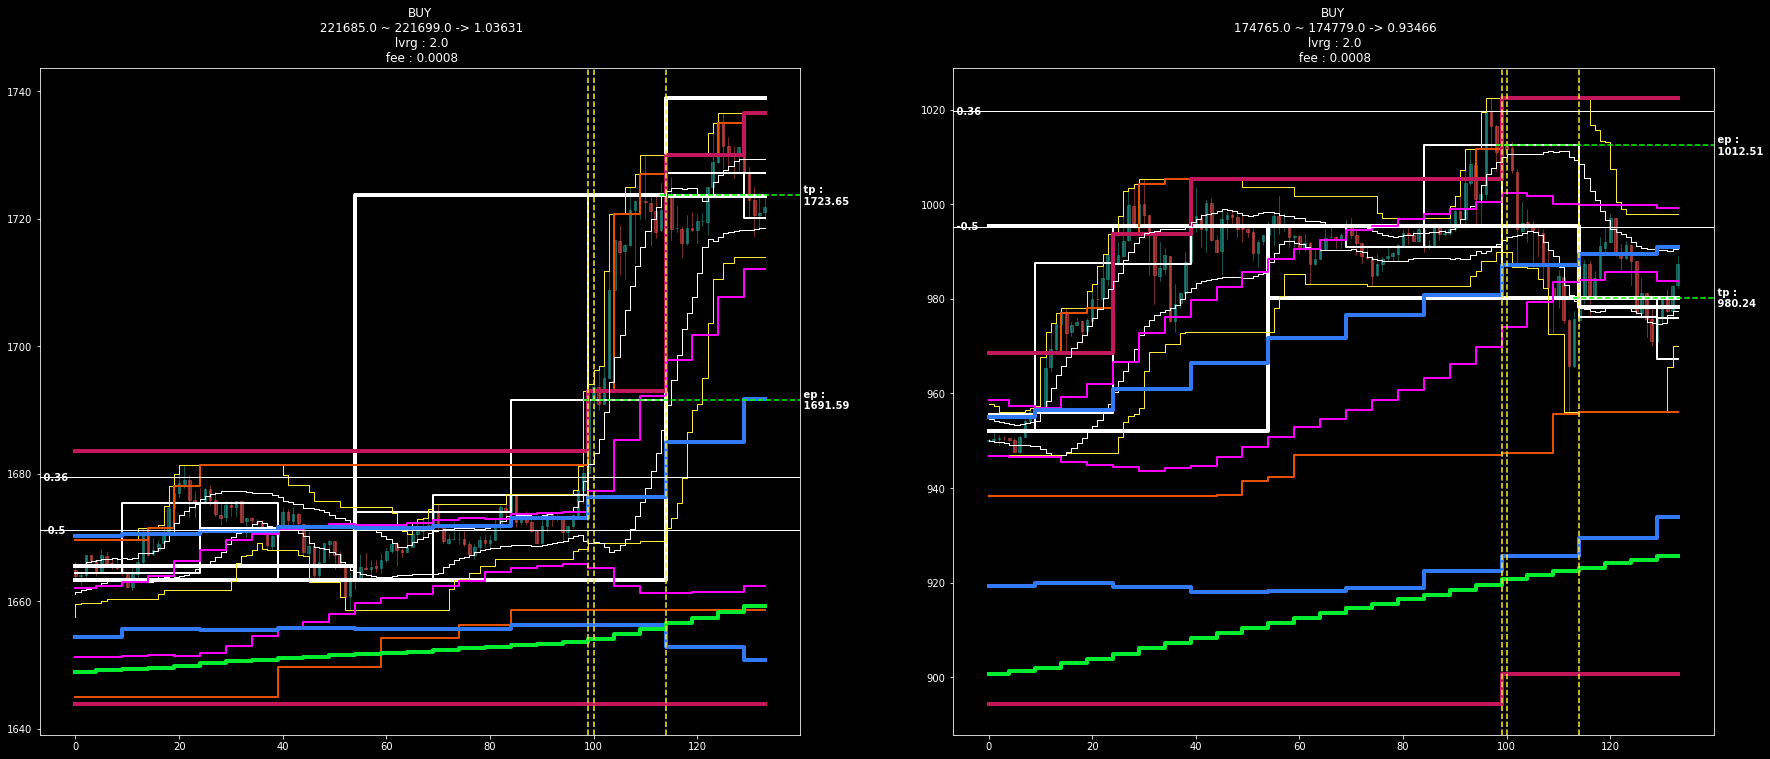

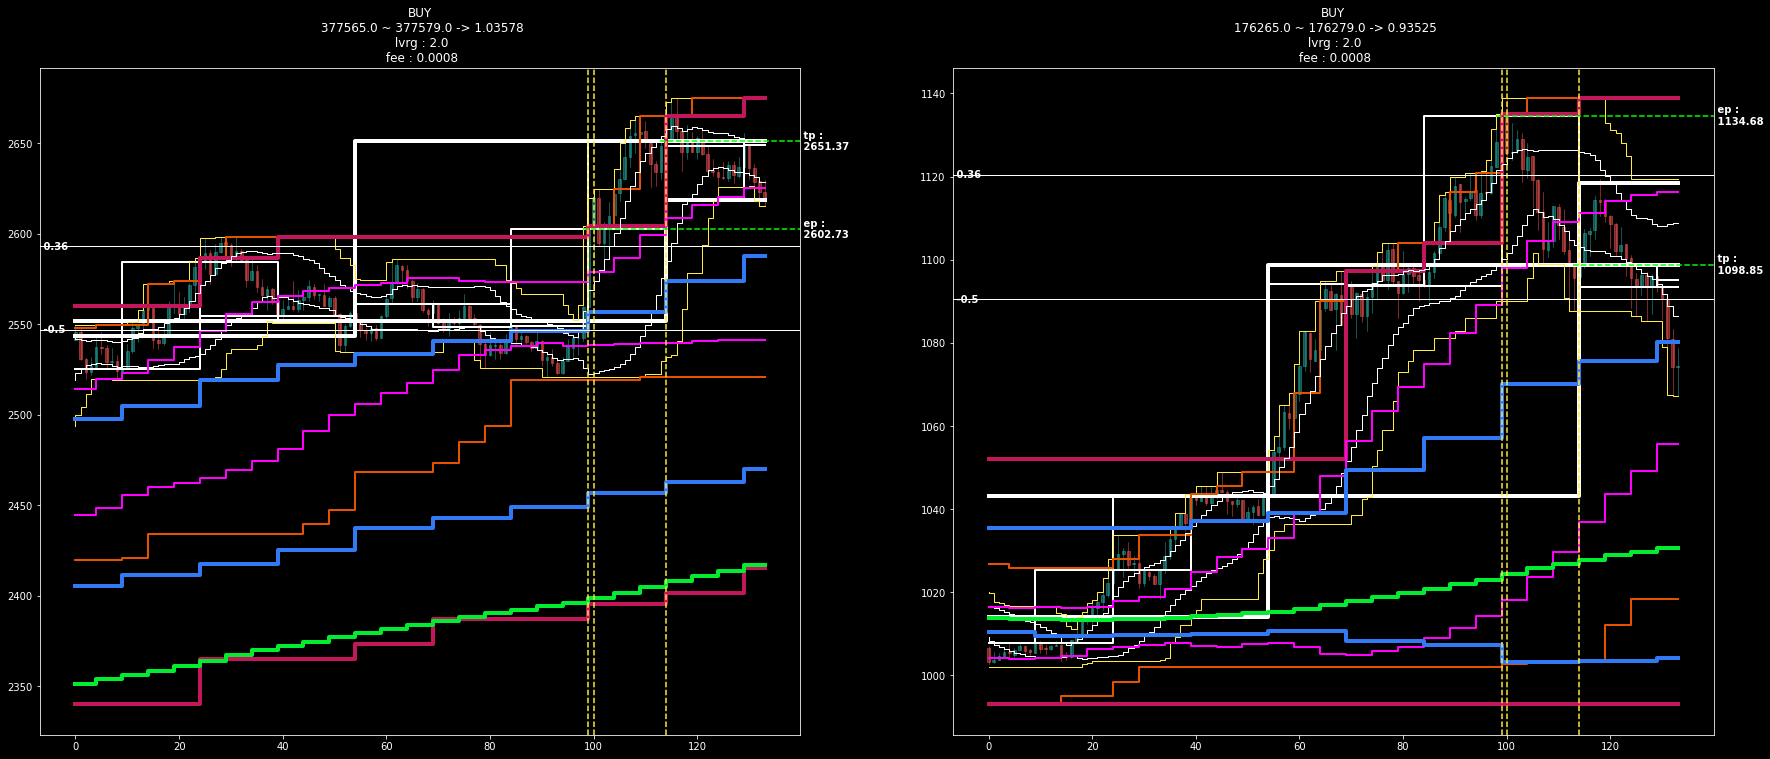

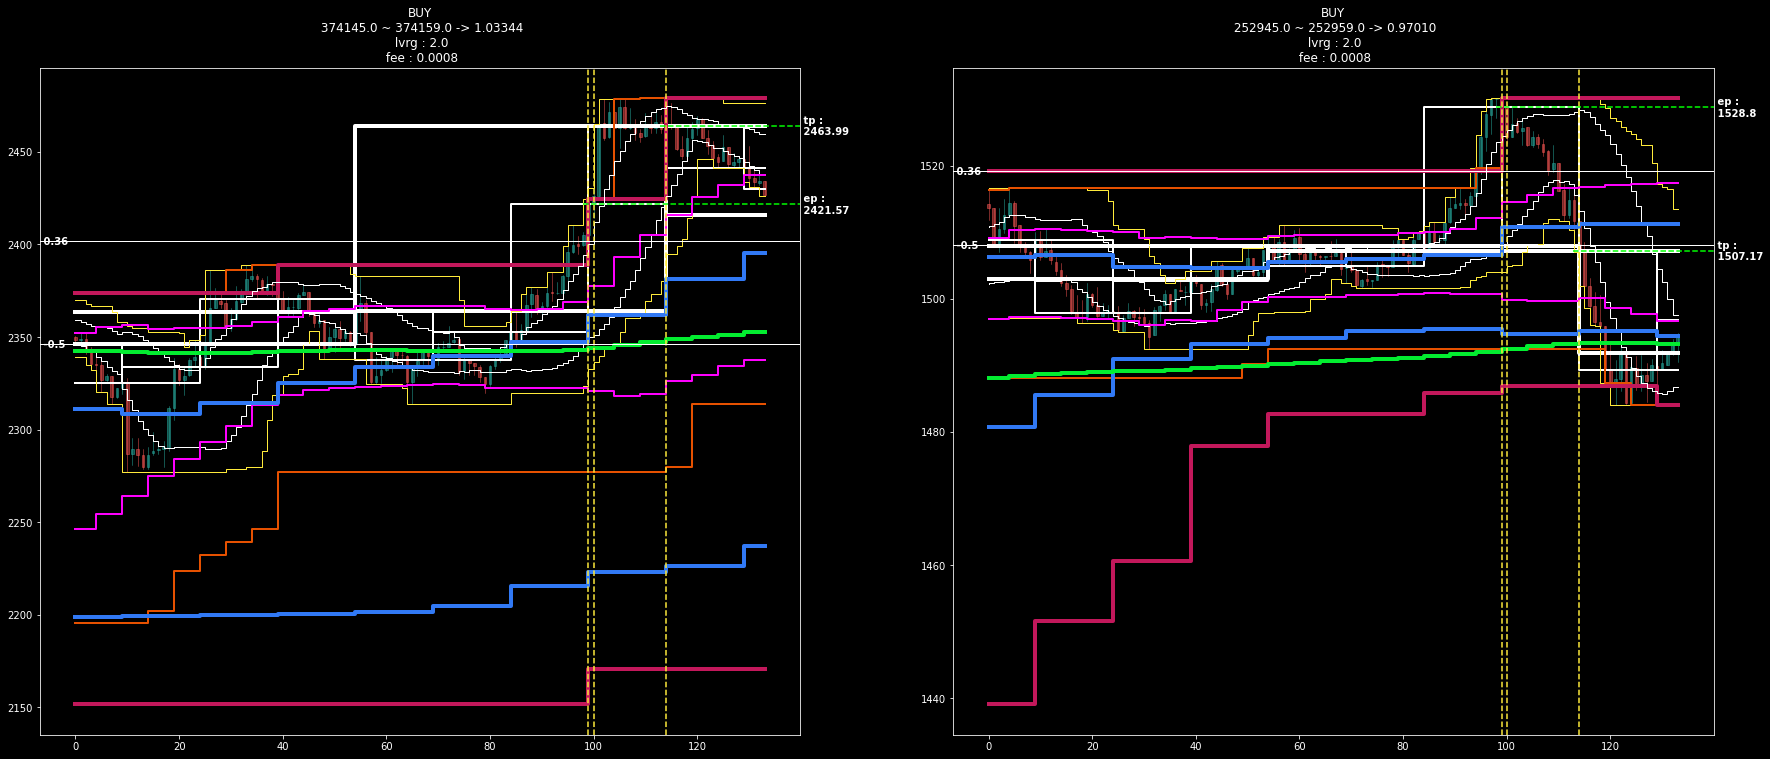

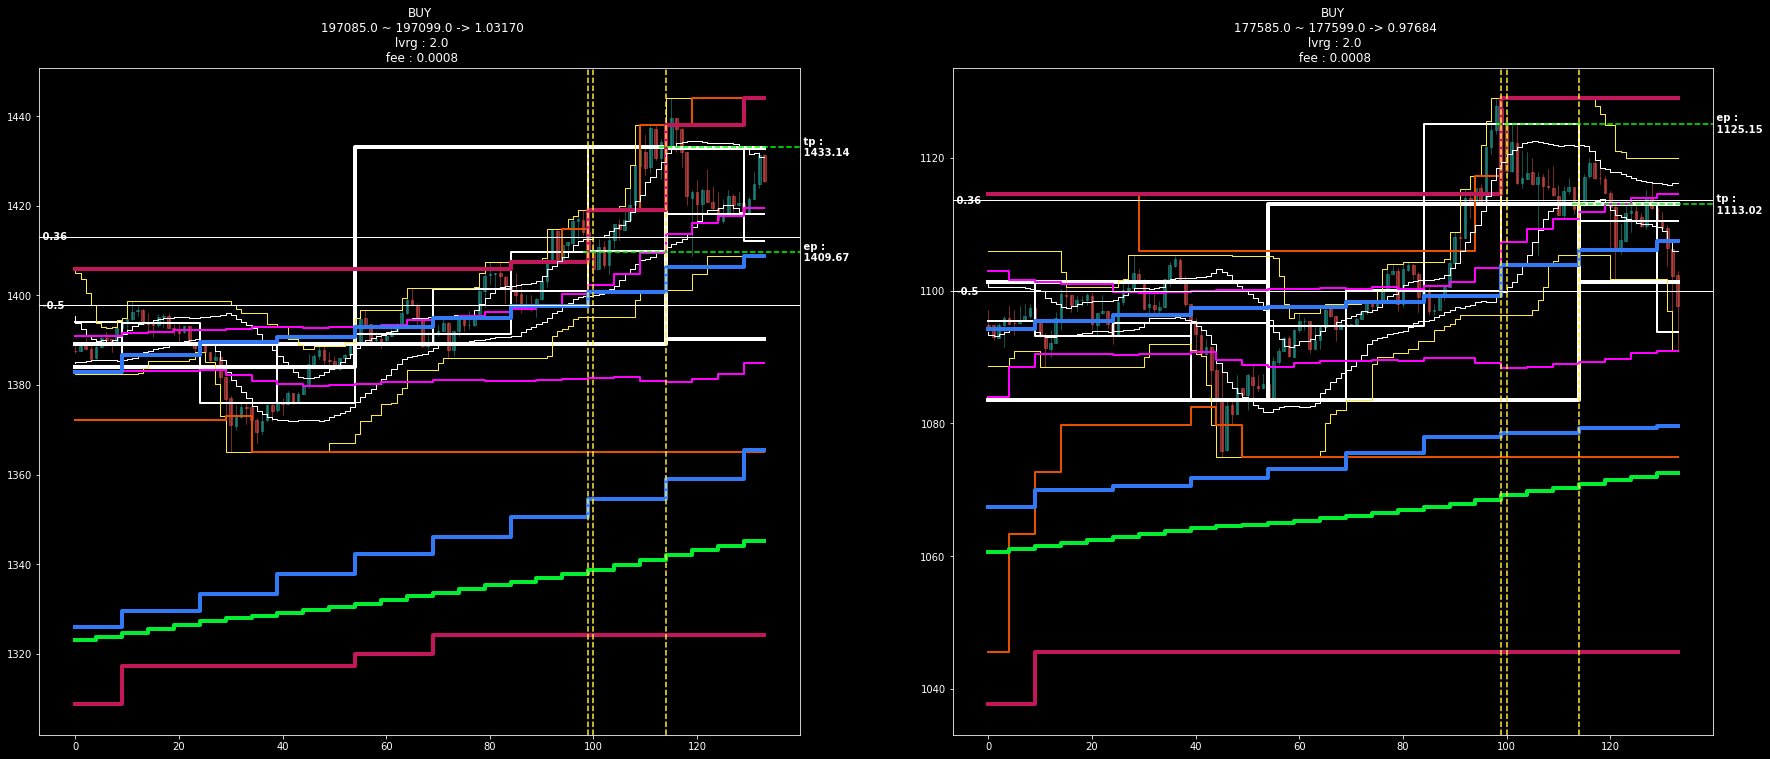

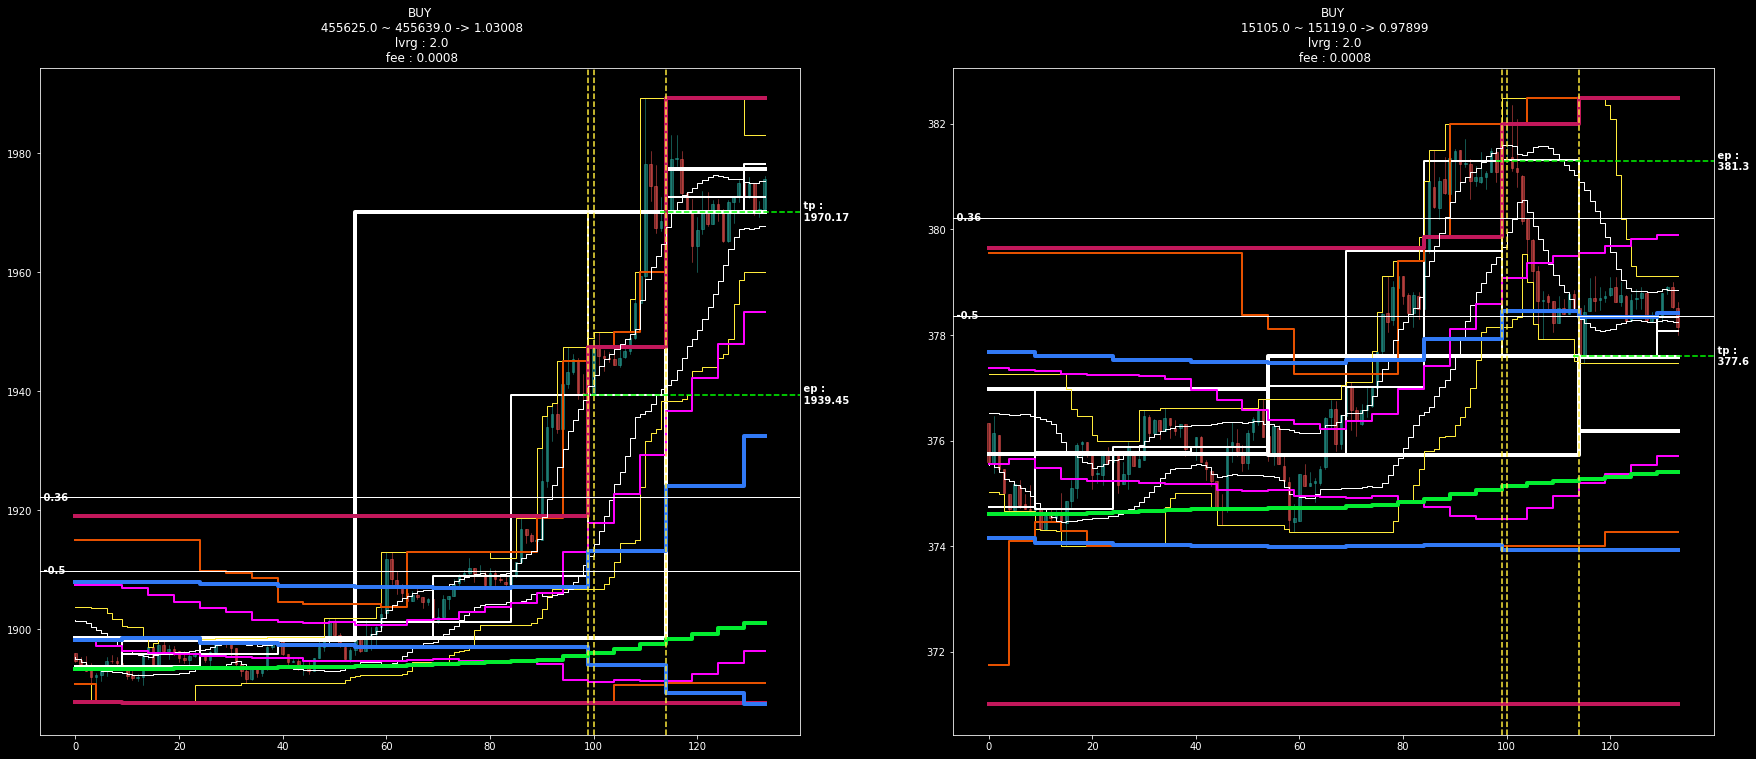

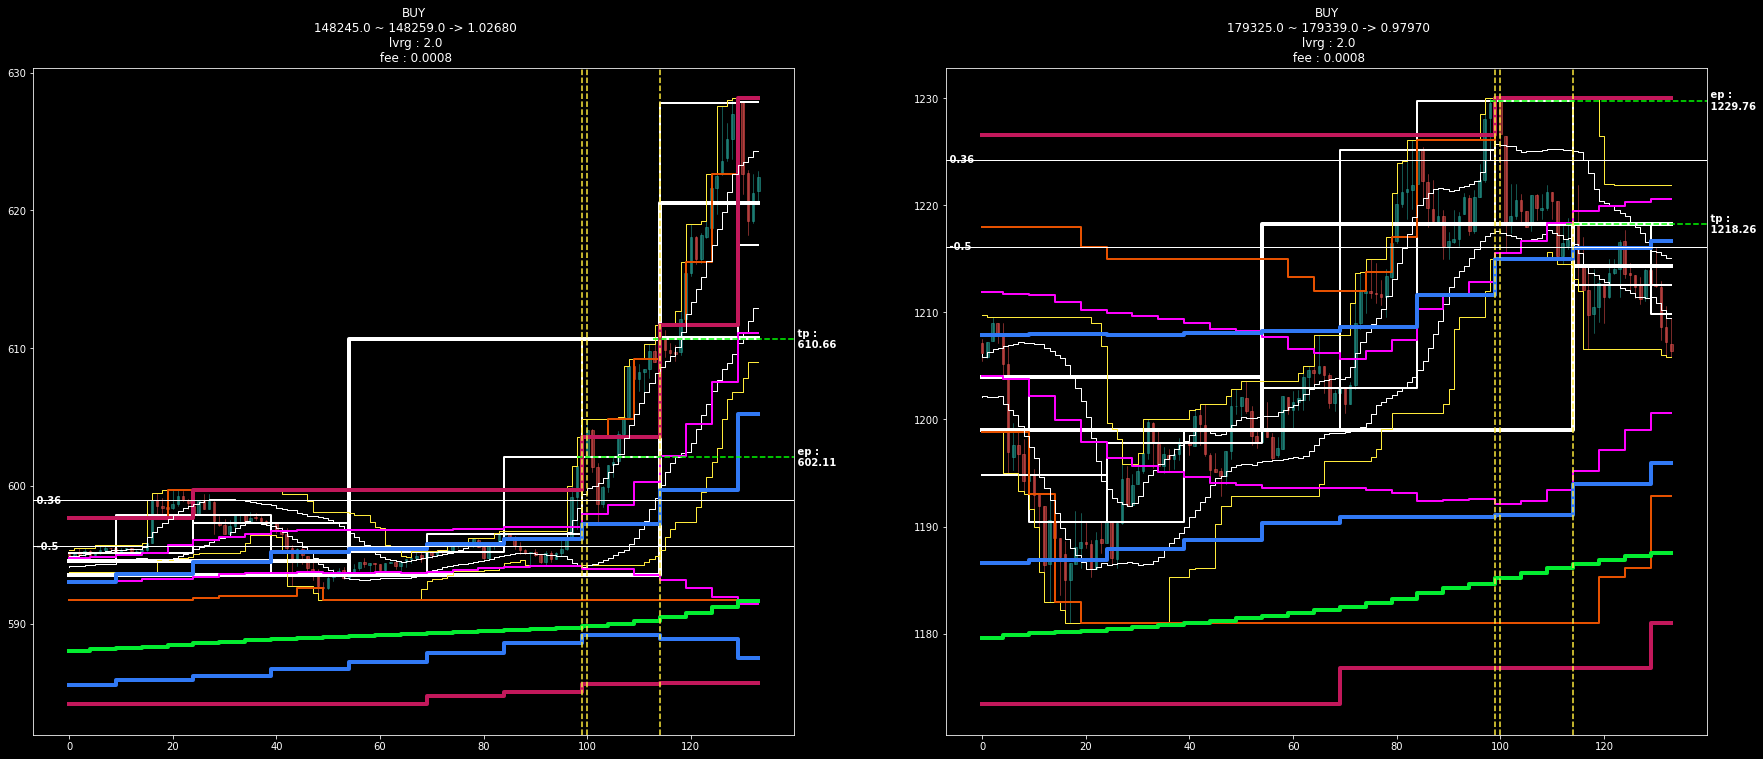

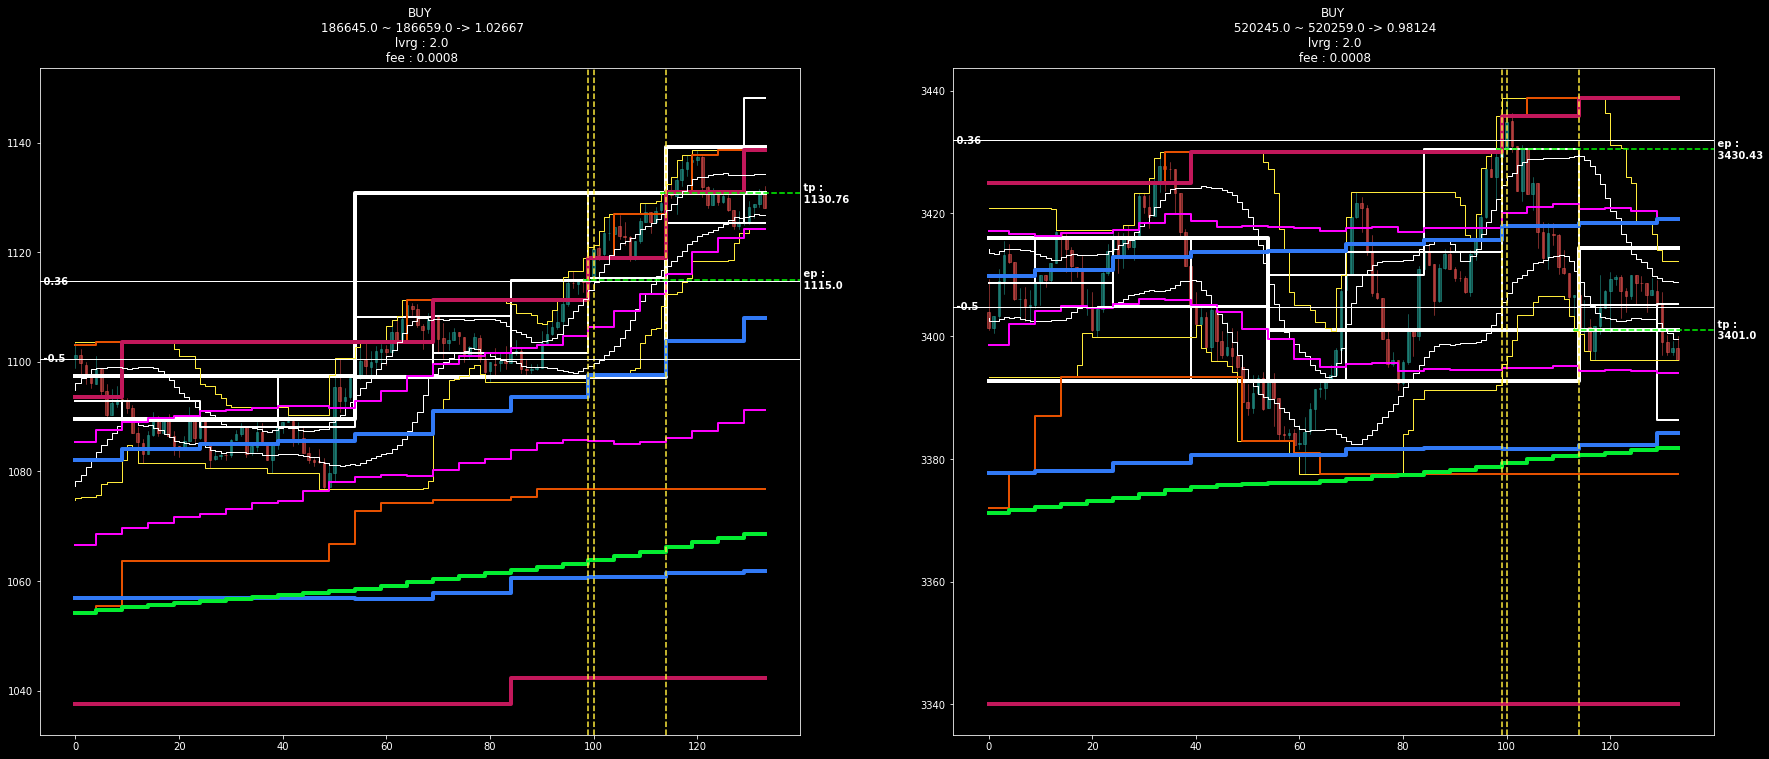

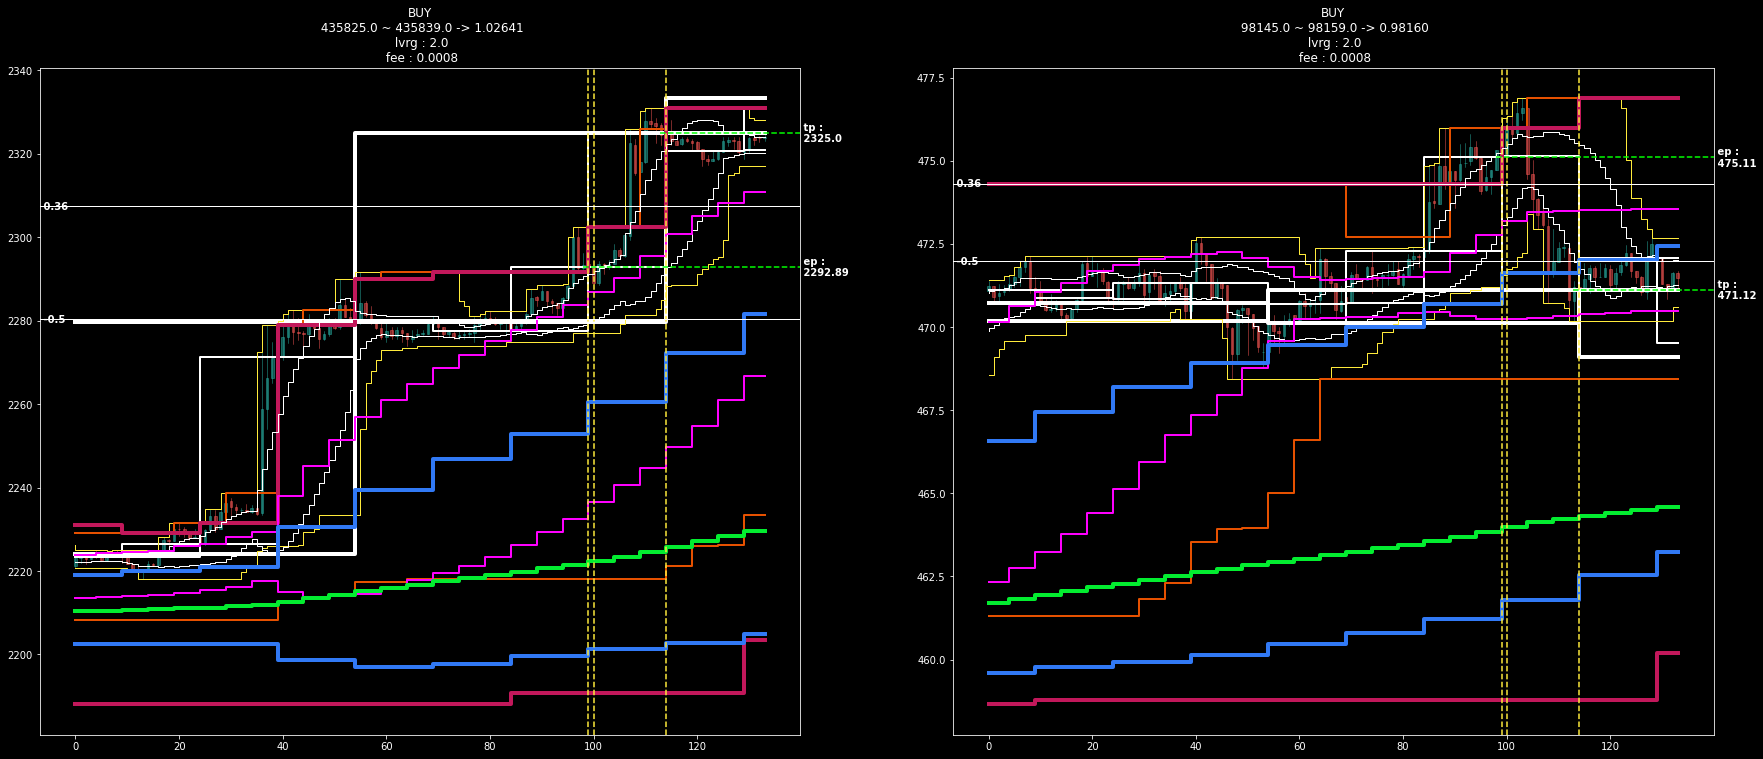

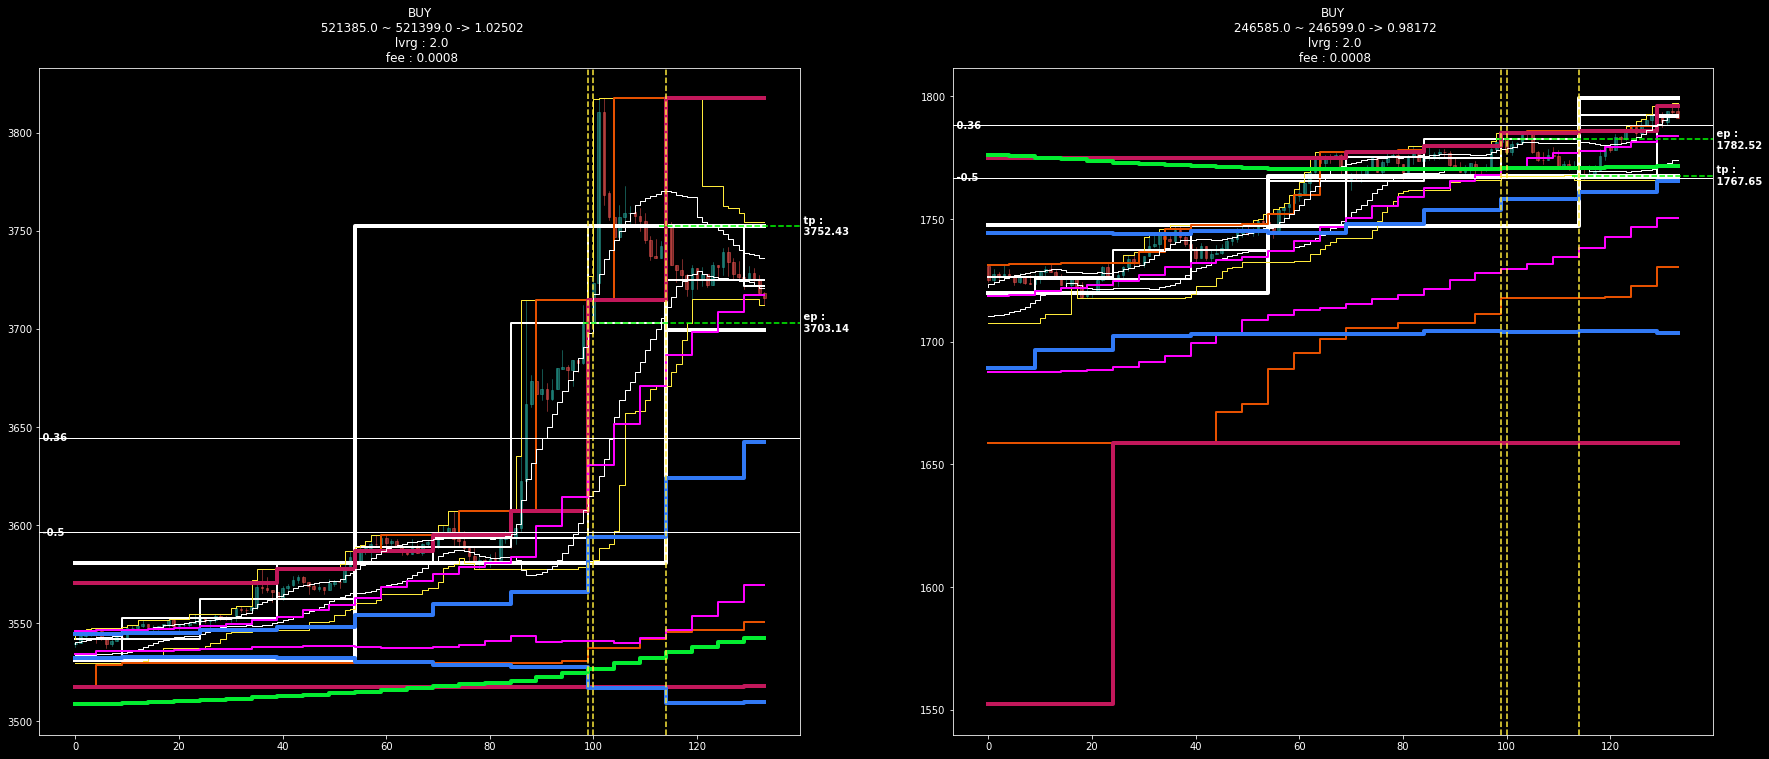

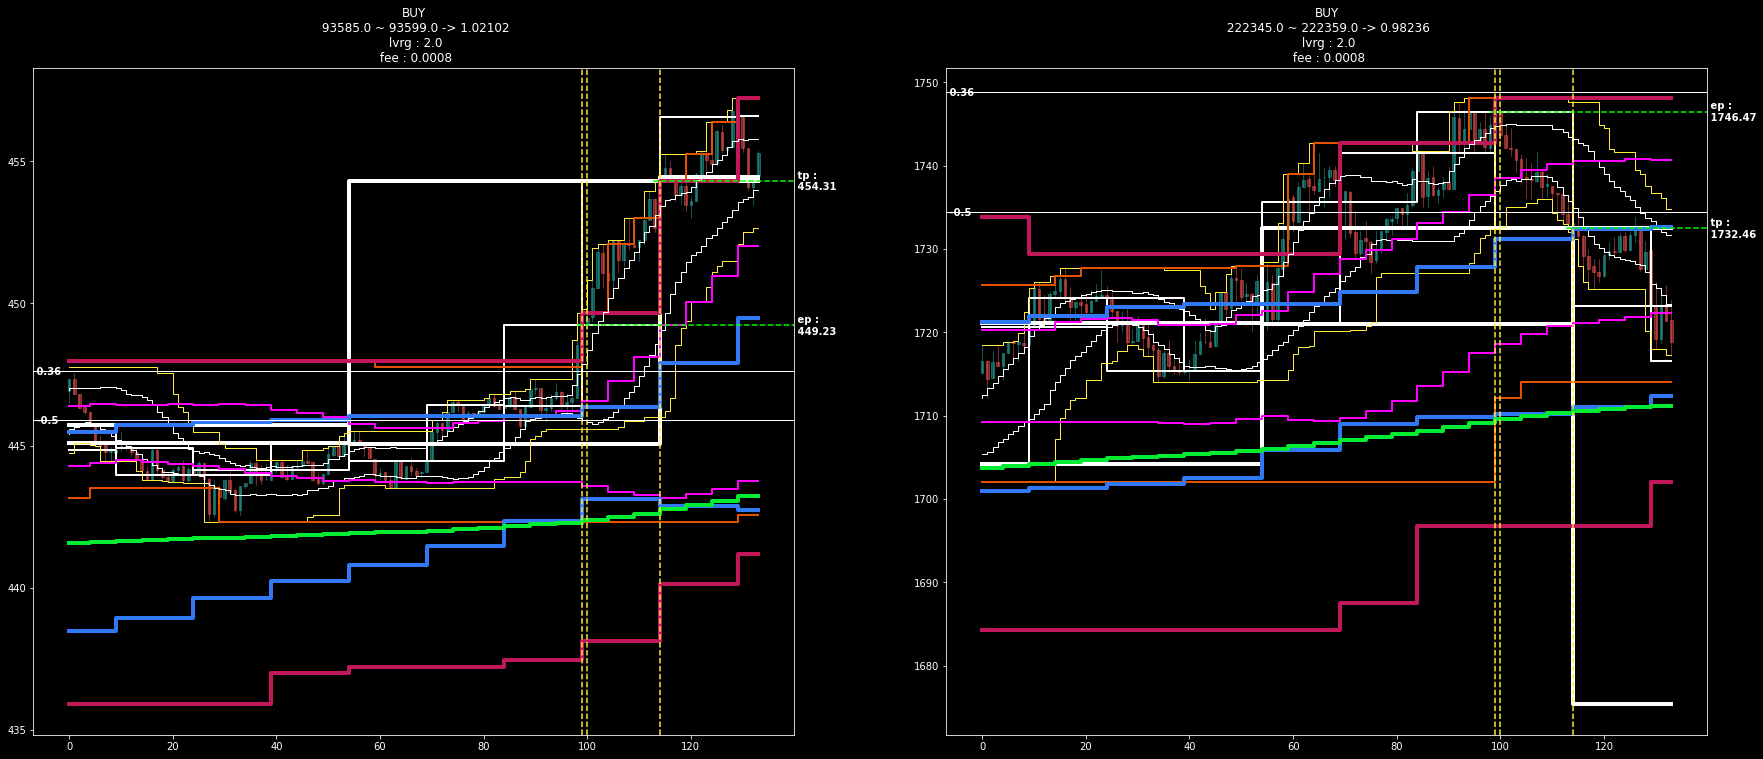

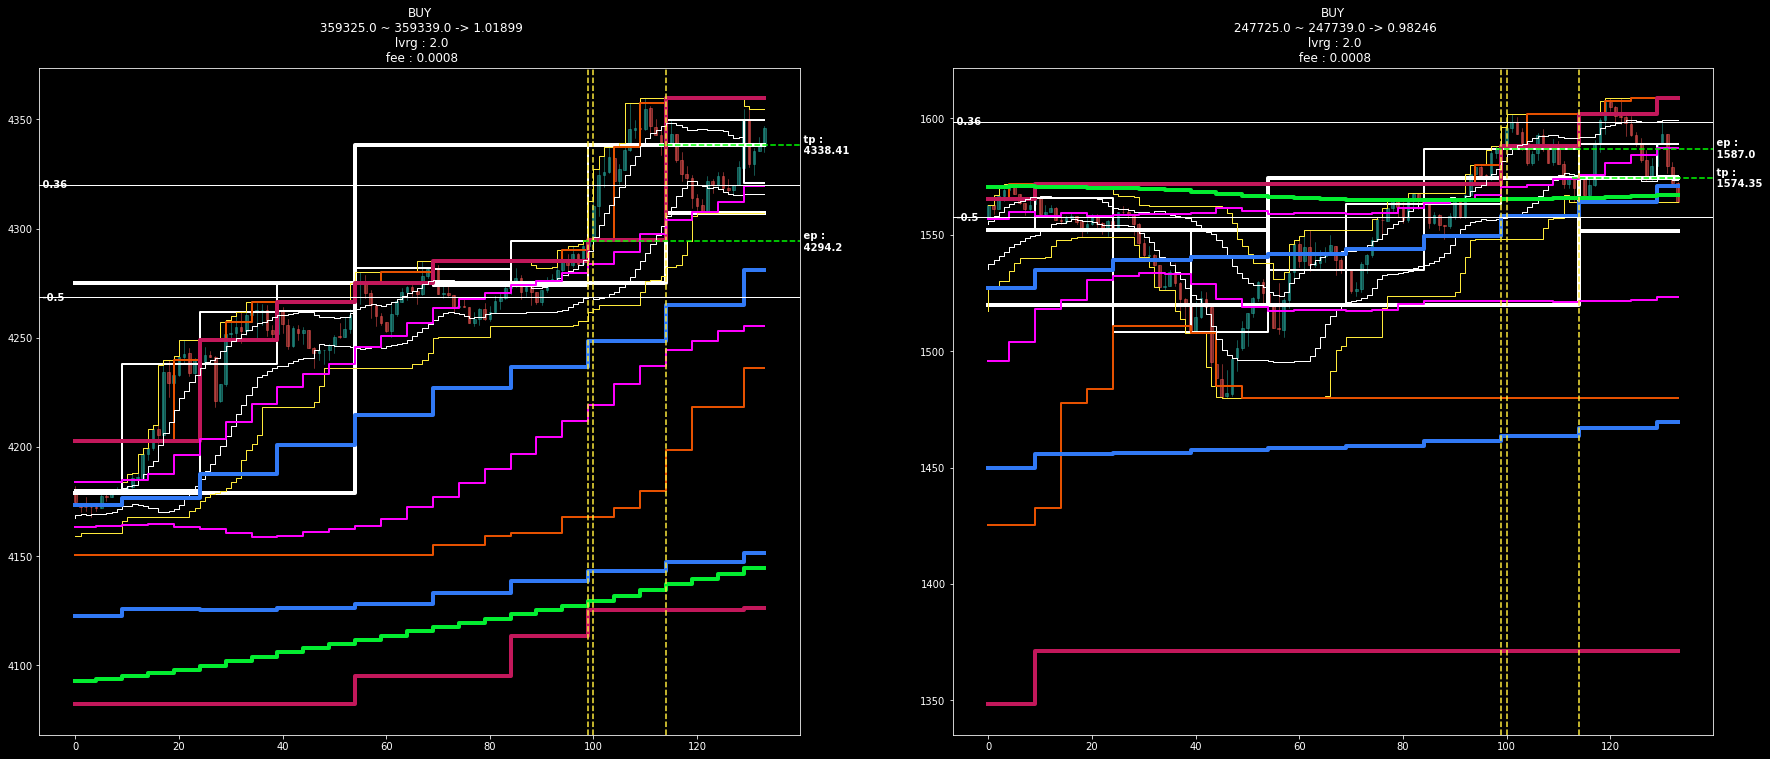

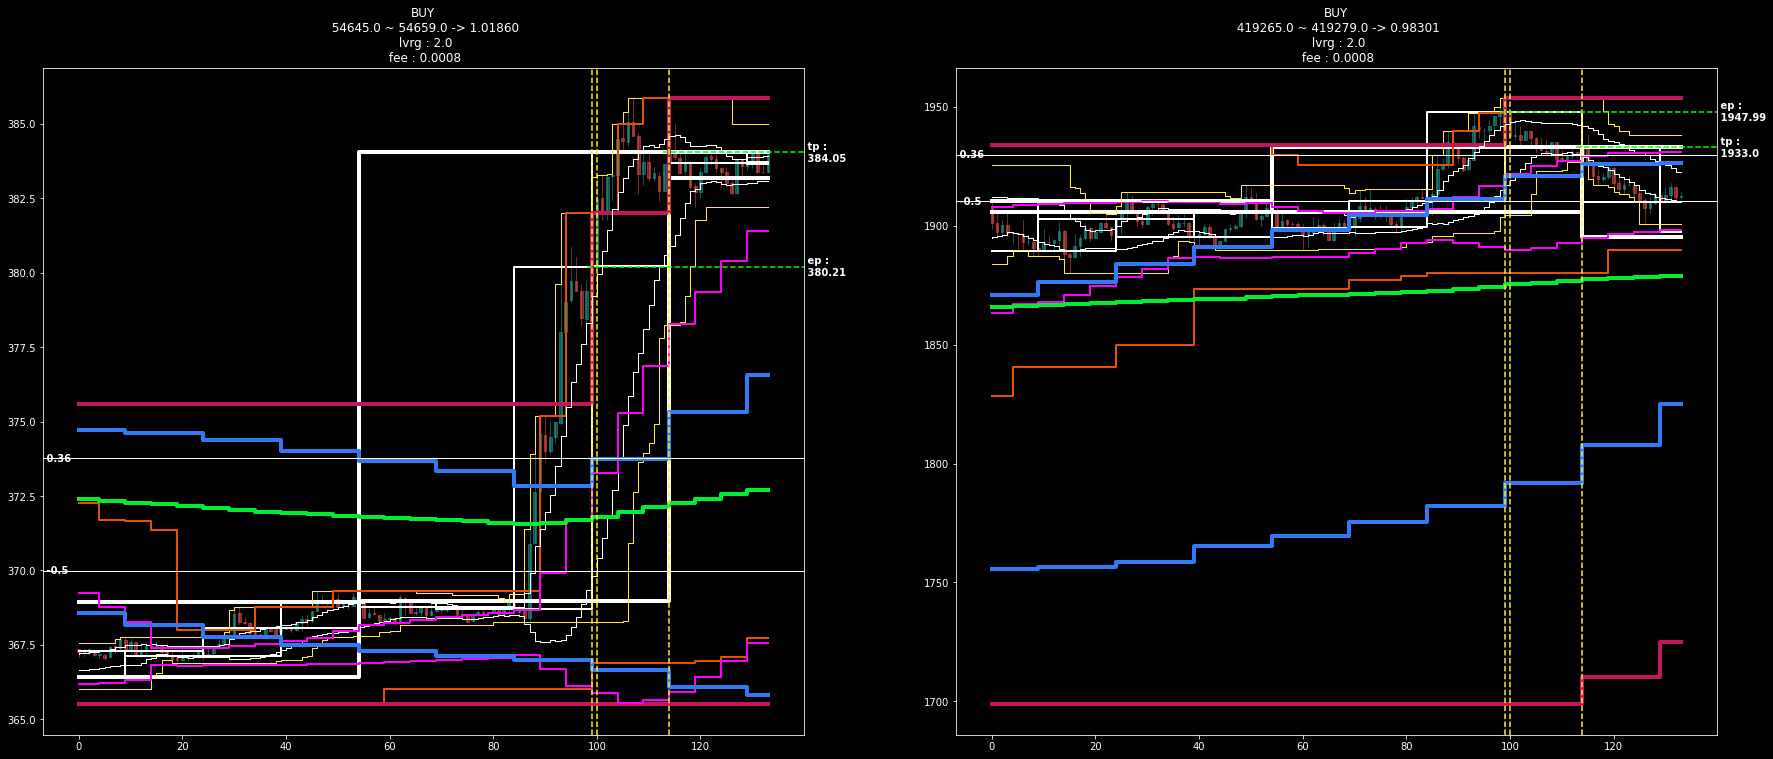

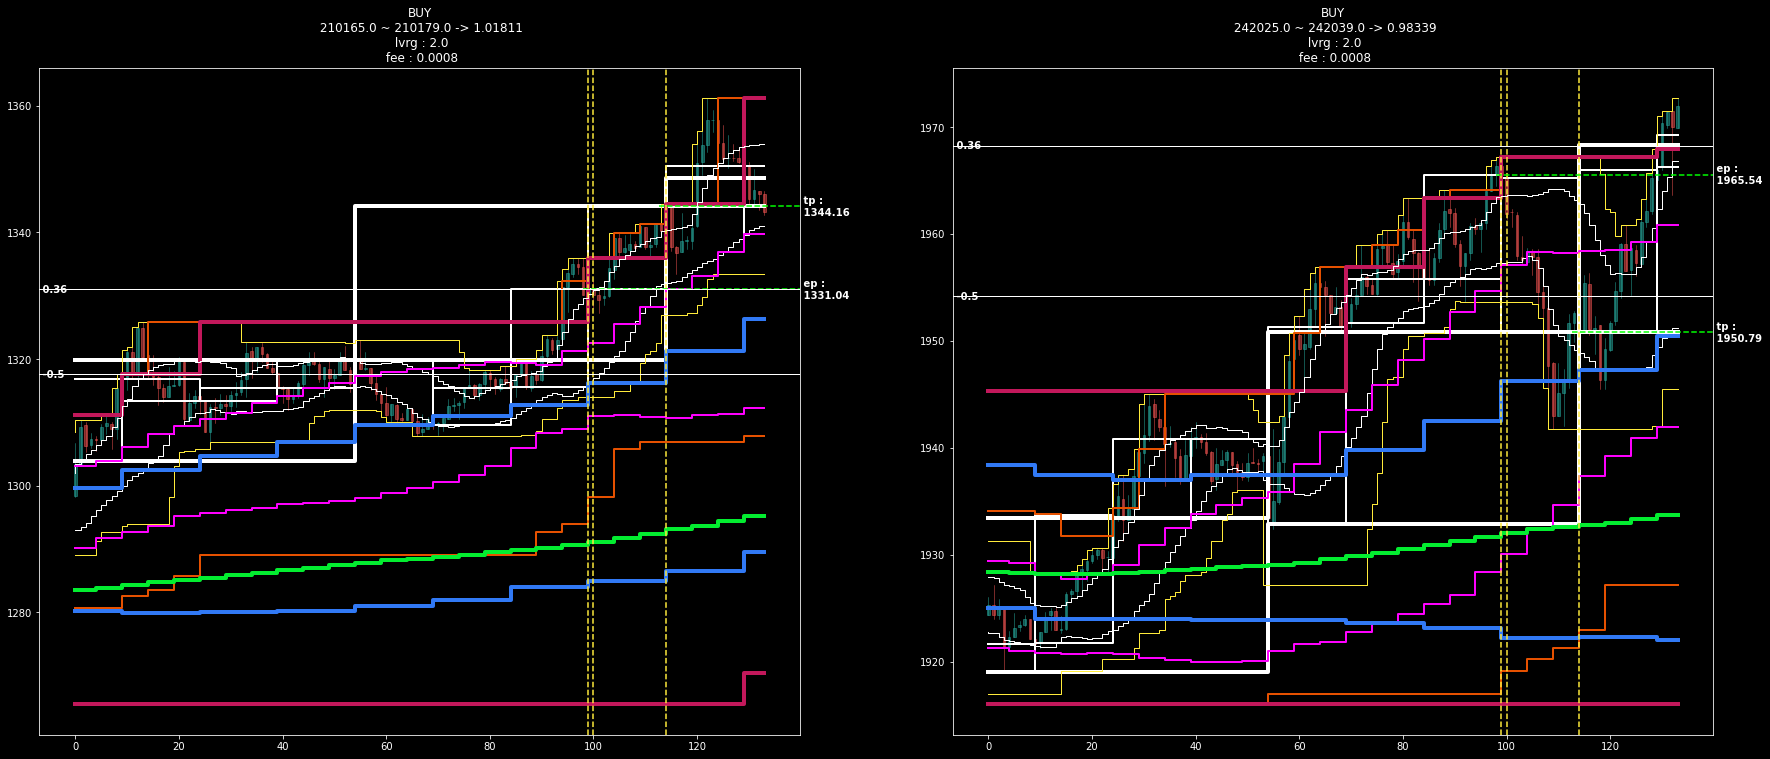

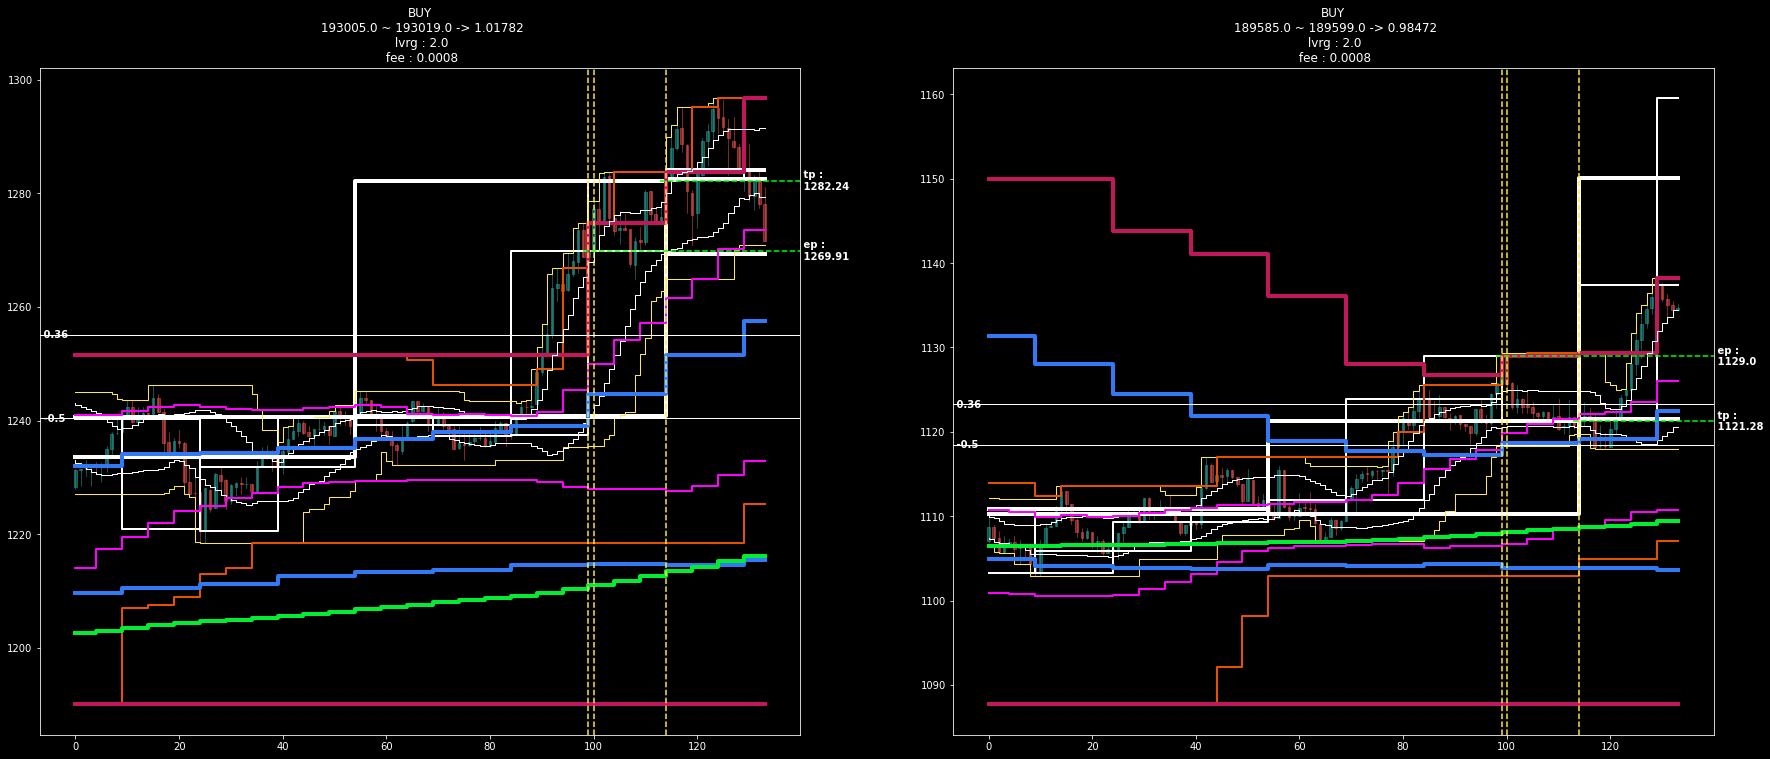

KeyboardInterrupt: ignored

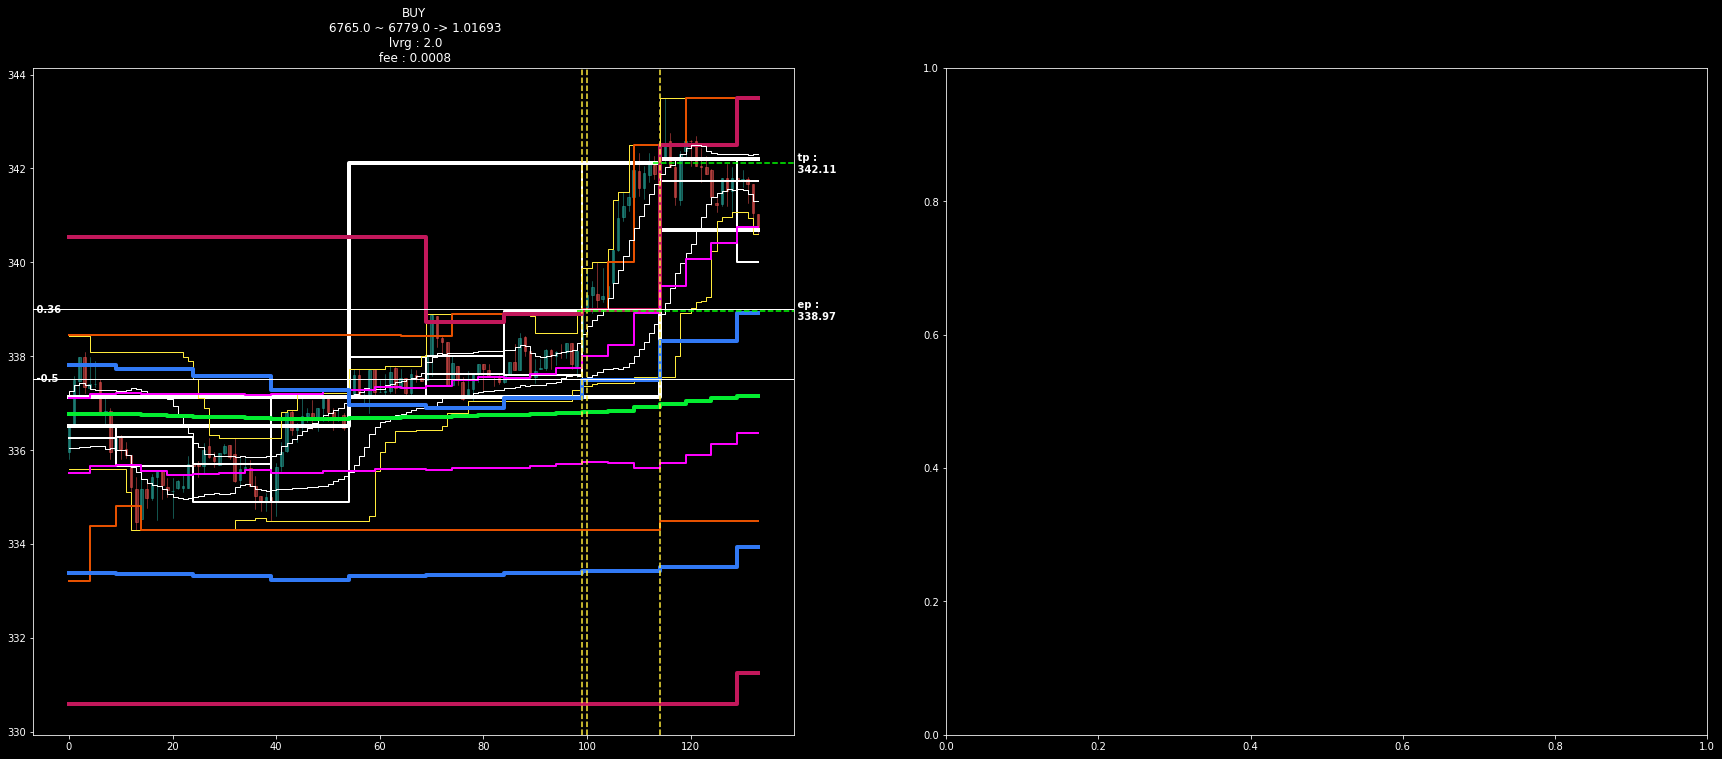

In [45]:
[plot_check_v2(np_df, config, param_zip, pr_msg, x_max, x_margin, front_plot, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

### plot_funcs - legacy

In [ ]:
def col_fillbw_plot(np_col, alpha=1, color='#ffffff', linewidth=2):
  # assert np_col.shape[-1] == 2, "assert np_col.shape[-1] == 2"
  try:
    plt.step(np.arange(len(np_col)), np_col, alpha=alpha, color=color, linewidth=linewidth)
  except Exception as e:
    print("error in col_fillbw_plot :", e)


def plot_check_v2(data, config, param_zip, pr_msg, x_max, x_margin, front_plot, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 18))
  nrows, ncols = 2, 2
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                         ncols=ncols,
                         height_ratios=[3, 1]
                         )
  for gs_idx, params in enumerate(param_zip):
    ax = fig.add_subplot(gs[gs_idx])
    iin, iout, pr, ep, tp, entry_idx, exit_idx, open_idx, lvrg, fee, tp_line, out_line = params

    # ------------ add_col section ------------ #
    a_data = data[int(iin):int(iout)]
    # a_data = data[iin:iout]
    # ------ candles ------ #
    candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax)
    
    # ------ add cols ------ #
    [col_step_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]

    # ------ ep, tp + xlim ------ #    
    if front_plot:
      x_max = ep_tick
    ep_tick = eptp_hvline_v2(config, ep, tp, entry_idx, exit_idx, open_idx, tp_line, out_line, iin, iout, x_max)
    
    #     Todo    #
    #     2. y_lim by norm_range_cols
    #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

    # ------ trade_info ------ #
    plt.title(pr_msg.format(entry_idx, exit_idx, pr, lvrg, fee))

  plt.show()
  plt.close()
  print()
  # print("elapsed time :", time.time() - start_0)

  
def eptp_hvline_v2(config, ep, tp, entry_idx, exit_idx, open_idx, tp_line, out_line, iin, iout, x_max):
  # ------ vline entry & exit ------ #
  ep_tick = entry_idx - iin
  open_tick = ep_tick - int(entry_idx - open_idx)
  # tp_tick = ep_tick + (exit_idx - entry_idx)
  tp_tick = ep_tick + int(exit_idx - entry_idx)
  plt.axvline(open_tick, alpha=1, linestyle='--', color='#ffeb3b')
  plt.axvline(ep_tick, alpha=1, linestyle='--', color='#ffeb3b')
  plt.axvline(tp_tick, alpha=1, linestyle='--', color='#ffeb3b')

  if (iout - iin) > x_max:
    plt.xlim(0 - x_margin, x_max + x_margin)
  x0, x1 = plt.gca().get_xlim()  
  # ------ hline entry & exit ------ #
  ep_xmin = ep_tick / x1
  tp_xmin = tp_tick / x1
  plt.axhline(ep, linestyle='--', xmin=ep_xmin, xmax=1, alpha=1, color='lime')  # ep line axhline
  plt.text(x1, ep, ' ep :\n {}'.format(ep), ha='left', va='center', fontweight='bold')  # ep line label
  plt.axhline(tp, linestyle='--', xmin=tp_xmin, xmax=1, alpha=1, color='lime')  # tp line axhline
  plt.text(x1, tp, ' tp :\n {}'.format(tp), ha='left', va='center', fontweight='bold')  # tp line label

  # ------ tpout_line ------ #
  plt.axhline(tp_line, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
  plt.text(x0, tp_line, ' %s' % config.tr_set.tp_gap, ha='left', va='center', fontweight='bold')
  plt.axhline(out_line, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
  plt.text(x0, out_line, ' %s' % config.tr_set.out_gap, ha='left', va='center', fontweight='bold')

  return ep_tick

### sync_check

In [ ]:
save_plot = 0

open_idx_range = reversed(range(0, len(res_df), 1000))
plot_range = 100

x_max = 400

inversion = 0
hedge = 0


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    

prev_plotsize = 30
post_plotsize = 20



h_candle_intv1 = 15
h_candle_intv2 = 60
if 'hopen_{}'.format(h_candle_intv2) not in res_df.columns:
  res_df = h_candle(res_df, h_candle_intv1)
  res_df = h_candle(res_df, h_candle_intv2)

res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
res_df["ma60_1m"] = res_df['close'].rolling(60).mean()

res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line)
# res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=1, use_dtk_line=1)
# break

rtc_list = ["short_tp_1_{}".format(strat_version), "short_tp_gap_{}".format(strat_version), "long_tp_1_{}".format(strat_version), "long_tp_gap_{}".format(strat_version)]
# h_rtc_list = ["h_short_tp_1", "h_short_tp_gap", "h_long_tp_1", "h_long_tp_gap"]
dtk_list = ["short_dtk_1_{}".format(strat_version), "short_dtk_gap_{}".format(strat_version), "long_dtk_1_{}".format(strat_version), "long_dtk_gap_{}".format(strat_version),
            # "short_dtk_1_line", "short_dtk_gap_line", "long_dtk_1_line", "long_dtk_gap_line",
            "short_dtk_plot_1", "short_dtk_plot_gap", "long_dtk_plot_1", "long_dtk_plot_gap"]
dc_v2_list = ['dc_upper_v2_{}'.format(strat_version), 'dc_lower_v2_{}'.format(strat_version)]


ohlc_list = ['open', 'high', 'low', 'close'] # + basic_st_list
hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hopen_%s' % h_candle_intv2, 'hclose_%s' % h_candle_intv2]
# hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hhigh_%s' % h_candle_intv2, 'hlow_%s' % h_candle_intv2]

# --------------------- dc & bb level --------------------- #
dc_interval = '1m'
hdc_interval = '5m'
hhdc_interval = '15m'

st_list = ['st_base_%s' % hhdc_interval, 'st_upper_%s' % hhdc_interval, 'st_lower_%s' % hhdc_interval]

dc_list = ['dc_upper_%s' % dc_interval, 'dc_lower_%s' % dc_interval]
hdc_list = ['dc_upper_%s' % hdc_interval, 'dc_lower_%s' % hdc_interval]
hhdc_list = ['dc_upper_%s' % hhdc_interval, 'dc_lower_%s' % hhdc_interval]

bb_interval = dc_interval
hbb_interval = hdc_interval
hhbb_interval = hhdc_interval

bb_list = ['bb_upper_%s' % bb_interval, 'bb_lower_%s' % bb_interval]
hbb_list = ['bb_upper_%s' % hbb_interval, 'bb_lower_%s' % hbb_interval]
hhbb_list = ['bb_upper_%s' % hhbb_interval, 'bb_lower_%s' % hhbb_interval]

bbwp_list = ['bbwp', 'bbwp_ma']


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1']
senkoub_list = ['senkou_b1']

sar_list = ['sar_3m', 'sar_5m', 'sar_15m']

ma_list = ['ma30_1m', 'ma60_1m']
sma_list = ['sma_1m']

ema_list = ['ema_5m']
# cb_list = ['cloud_bline_1m']
cb_list = ['cloud_bline_30m']
# cb_list = ['cloud_bline_5m']



# -------------- under price phase -------------- #
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3']
# stoch_list = ['stoch_5m']
# fisher_list = ['fisher30', 'fisher60', 'fisher120']
# cctbbo_list = ['cctbbo']
# emaroc_list = ['ema_roc']
rsi_list = ['rsi_%s' % config.loc_set.point.exp_itv] 
cci_list = ['cci_%s' % config.loc_set.point.exp_itv] 


# -------------- summation -------------- #
# input_colname = ohlc_list + basic_st_list + pline_list + bb_list + hbb_list + sma_list + cb_list + stoch_list + sar_list + dc_list
input_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dtk_list + dc_v2_list + rsi_list + ema_list + ma_list + st_list# + cci_list

# yrange_colname = ohlc_list + basic_st_list + pline_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + dc_v2_list + ema_list # currently just used for ymin, ymax



odd_cnt = 0
obj_i = -1
rev_obj_i = 0

#   지금, continue 발생시 true / false idx 가 같이 상승하는 문제

# while 1:
for open_idx in open_idx_range:

  # if obj_i >= len_obj or rev_obj_i >= len_obj:
  #   break

  # if odd_cnt % 2 == 1 and tf_plot: #  loss plot 을 채워야하는 상황
  #   rev_obj_i += 1

  # else:
  #   obj_i += 1

  if not(i >= prev_plotsize):
    continue
  

  odd_cnt += 1

  # break

  print("open_idx :", open_idx)
  
  plot_df = res_df.iloc[open_idx - prev_plotsize:open_idx + plot_range + post_plotsize][input_colname]
  
  odds = 1 if odd_cnt % 2 == 1 else 2
  if odds == 1:

    plt.style.use('dark_background')

    fig = plt.figure(figsize=(26, 18))
    
    gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                        ncols=2, # col 몇 개 
                        height_ratios=[3, 1]
                        )
    
  ax = fig.add_subplot(gs[odds - 1])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='#26a69a', colordown='#ef5350', alpha=0.5)

  # ---------- h_candle ---------- #
  alpha = 1
  lw = 1
  for cd_i, candle in enumerate(hcandle_list):

    if cd_i == 2:
      lw = 2      
    plt.step(np.arange(len(plot_df)), plot_df[candle].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.1
  # plt.fill_between(np.arange(len(plot_df)), plot_df['hclose_60'].values, plot_df['hopen_60'].values, 
  #                     where=1, facecolor='#ffffff', alpha=alpha)  
  

   # --------- ma --------- #
  alpha = 1
  lw = 2
  for ma_i, item in enumerate(ma_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

   # --------- ema --------- #
  alpha = 1
  lw = 4
  for sm_i, item in enumerate(ema_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
    
   # --------- st --------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(st_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#00ff00', linewidth=lw)

  # ---------------------- dc_v2 ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_v2_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # # ---------------------- dc ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # # ---------------------- hdc ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(hdc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#e65100', linewidth=lw)

  # # ---------------------- hhdc ---------------------- #
  # alpha = 1
  # lw = 4
  # for sm_i, item in enumerate(hhdc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#c2185b', linewidth=lw)


  # # ---------------------- bb ---------------------- #
  # alpha = 1
  # lw = 1
  # for sm_i, item in enumerate(bb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % bb_interval].values, plot_df['bb_lower_%s' % bb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % bb_interval].values >= plot_df['bb_lower_%s' % bb_interval].values, facecolor='#ffffff', alpha=alpha)   

  # # ---------------------- hbb ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(hbb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ff00ff', linewidth=lw)
  
  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hbb_interval].values, plot_df['bb_lower_%s' % hbb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % hbb_interval].values >= plot_df['bb_lower_%s' % hbb_interval].values, facecolor='#ff00ff', alpha=alpha) 
  
  # # ---------------------- hhbb ---------------------- #

  # alpha = 1
  # lw = 4
  # for sm_i, item in enumerate(hhbb_list):
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#3179f5', linewidth=lw)
  
  # alpha = 0.2
  # plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hhbb_interval].values, plot_df['bb_lower_%s' % hhbb_interval].values, 
  #                     where=plot_df['bb_upper_%s' % hhbb_interval].values >= plot_df['bb_lower_%s' % hhbb_interval].values, facecolor='#3179f5', alpha=alpha) 
  
  # ------------------- dtk_line (old, tp_line) ------------------- #
  
  # alpha = 1
  # lw = 2
  # rtc_ratio_list = [config.loc_set.zone.dt_k]
  
  # for rtc_k in rtc_ratio_list:    
  #   # plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1_line'].values - plot_df['short_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1_line'].values + plot_df['long_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k)  

  # alpha = 1
  # lw = 4
  # # h_rtc_ratio_list = [config.loc_set.zone.dt_k]
  # h_rtc_ratio_list = [config.loc_set.zone.zone_dt_k]
  # # h_rtc_ratio_list = [0.272, 0.36, 0.4, 0.5]
  
  # for h_rtc_k in h_rtc_ratio_list:
  #   plt.step(np.arange(len(plot_df)), plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   plt.step(np.arange(len(plot_df)), plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_short_tp_1'].values - plot_df['h_short_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
  #   # plt.step(np.arange(len(plot_df)), plot_df['h_long_tp_1'].values + plot_df['h_long_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # # hy_min = np.min(plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k)
  # # hy_max = np.max(plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k)  

  # ------------- y lim ------------- #  
  y_max = max(np.max(plot_df[yrange_colname]))
  y_min = min(np.min(plot_df[yrange_colname]))
  # y_max = max(y_max, y_max_)
  # y_min = min(y_min, y_min_)
  
  # hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * 0.36)
  # hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * 0.36)  
  # y_max = max(y_max, y_max_, hy_max)
  # y_min = min(y_min, y_min_, hy_min)

  if np.isnan(y_max) or np.isnan(y_min):
    print('continued in yminmax')
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break

  plt.ylim(y_min, y_max)


  # ---------------------- plot ---------------------- #

  #           rsi          #    
  plt.subplot(gs[odds + 1])
  alpha = 1
  for rsi_ in rsi_list:
    plt.step(np.arange(len(plot_df)), plot_df[rsi_].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axhline(50, linestyle='--')
  plt.axhline(50 + config.loc_set.point.osc_band, linestyle='--')
  plt.axhline(50 - config.loc_set.point.osc_band, linestyle='--')
  
  plt.axvline(prev_plotsize, linestyle='--')
  
  #           cci          #    
  # plt.subplot(gs[odds + 1])
  # alpha = 1
  # for cci_ in cci_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cci_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axhline(config.loc_set.point.osc_band, linestyle='--')
  # plt.axhline(-config.loc_set.point.osc_band, linestyle='--')
  
  # plt.axvline(prev_plotsize, linestyle='--')


  if len(plot_df) > x_max:
    x_margin = x_max / 20
    plt.xlim(0 - x_margin, x_max + x_margin)


  if not save_plot:
    if odds == 2:
      plt.show()
      plt.close()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  # plt.close()  
  print()

  # break


### brief np_pr survey

In [ ]:
# plot_pr_list[:100]
plt.plot(np_pr)
plt.axhline(1)
plt.show()

### close & pr comp.

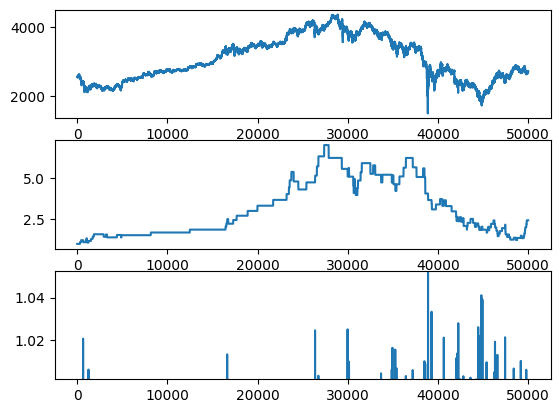

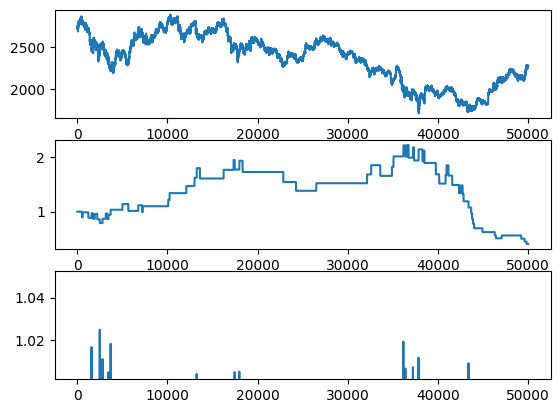

In [ ]:
#     chunky survey 필요함    #
chunk_size = 50000

sync_pr = np.ones(len(res_df))
sync_tr = np.zeros(len(res_df))
# sync_tr = np.empty(len(res_df))
# sync_tr[:] = np.nan

max_tr = np.max(tp_ratio_list)
min_tr = np.min(tp_ratio_list)

for ck_i in range(0, len(res_df), chunk_size):

  chunked_df = res_df.iloc[ck_i:ck_i + chunk_size]
  # break

  for pr_, eptp_idx, tr_ in zip(pr_list[ck_i:ck_i + chunk_size], trade_list[ck_i:ck_i + chunk_size], tp_ratio_list[ck_i:ck_i + chunk_size]):
    # print(pr_, eptp_idx)
    sync_pr[eptp_idx[-1][0]] = pr_
    sync_tr[eptp_idx[-1][0]] = tr_
    # break

  chunked_pr = sync_pr[ck_i:ck_i + chunk_size]
  chunked_tr = sync_tr[ck_i:ck_i + chunk_size]
  chunked_tr = np.where(np.isnan(chunked_tr), pd.Series(chunked_tr).shift(1), chunked_tr)

  # plt.figure(figsize=(8, 6))

  plt.subplot(311)
  plt.plot(np.arange(len(chunked_df)), chunked_df['close'])
  # plt.show()

  plt.subplot(312)
  plt.plot(np.cumprod(chunked_pr))
  
  plt.subplot(313)
  plt.plot(chunked_tr)
  plt.ylim(min_tr + 0.5 * (max_tr - min_tr), max_tr)
  
  plt.show()
  print()


### plot indi. legacy

In [ ]:

  # ---------------------- ma ---------------------- #
   # --------- ema --------- #
  # alpha = 1
  # for sm_i, item in enumerate(ema_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
  #   alpha -= 0.2

  #   # --------- sma --------- #
  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 4
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#e91e63', linewidth=lw)
  #   alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  # alpha = 1
  # for sm_i, item in enumerate(cb_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
  #   alpha -= 0.2


  
  # ---------------------- sar ---------------------- #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch_ in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')
  
  # ---------- bbw ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for bbwp_ in bbwp_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[bbwp_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(bbwp_thresh, linestyle='--')

  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')



### plot nontp case

## legacy

### shifting

In [ ]:
org_res_df = res_df.copy()

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272145    0.27005
2021-06-30 23:56:59.999  0.27274  0.27290  ...   0.272145    0.27005
2021-06-30 23:57:59.999  0.27246  0.27257  ...   0.272523    0.27021
2021-06-30 23:58:59.999  0.27166  0.27183  ...   0.272523    0.27021
2021-06-30 23:59:59.999  0.27144  0.27211  ...   0.272523    0.27021

[5 rows x 37 columns]
                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272523    0.27021
2021-06-30 23:56:59.999  0.27274  0.27290  ...        NaN        NaN
2021-06-30 23:57:59.999  0.27246  0.27257  ...        NaN        NaN
2021-06-30 23:58:59.999  0.27166  0.27183  ...        NaN        NaN
2021-06-30 23:59:59.999  0.27144  0.27211  ...        NaN        NaN

[5 rows x 37 columns]


### load model

In [ ]:
# model_name = 'inner_tick_cnnreg_lscalemm_prefee_gpu_%s_%s_%s_%s_%s.h5'

# model = tf.keras.models.load_model(ckpt_path + model_name)

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()


94773248/94765736 [==============================] - 1s 0us/step


#### gen selected vector

In [ ]:
def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

def expand_dims(npy_x):

  row, col = npy_x.shape
  npy_x2 = np.array(npy_x).reshape(-1, row, col, 1).astype(np.float32)
  # input_x = np.array(data_x).reshape(-1, row, col).astype(np.float32)

  #     1c to 3c    #
  npy_x3 = npy_x2 * np.ones(3, dtype=np.float32)[None, None, None, :]

  return npy_x3


def vector_dist(f1, f2):
  return np.linalg.norm(f1-f2)



# ------------------------ params ------------------------  #
selected_i = 500
input_size = 100



#   1. 선택된 인덱스를 입력받았을 때, input generating 형태만 만들어놓고,     #
#   1-1. input cols 필요함    #

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma']

#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

selected_price_colname = basic_list + senkoua_list + senkoub_list + sar_list
selected_outprice_colname = [macd_list]


#         global scaling for outer price data       #
#         1. nan 처리       #

# # print((np.isnan(df.values)))
# print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

# max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
# # print(max_nan)

# df = df.iloc[max_nan:-max_nan]

# total_gdata = []
# for g_col in selected_outprice_colname:

#   temp_data = min_max_scale(res_df[g_col])
#   total_gdata.append(temp_data)



#   1-2. cols 에 따른, scaling method 구분함    #
onprice_input_x = min_max_scale(res_df[selected_price_colname].iloc[selected_i - input_size:selected_i].values)
print(onprice_input_x.shape)


#   2. plot_check 에서 본인이 원하는 shape 의 인덱스를 선택   #
#   3. vertorize, 
#   3-1. input generator 를 이용해 entry signal 발생할 때마다 dist 비교 진행    #
re_onprice_input_x = expand_dims(onprice_input_x)
print(re_onprice_input_x.shape)
      
# break

selected_vector = model.predict(re_onprice_input_x, verbose=1)
print(selected_vector.shape)

### tr_tresh calc

In [ ]:
res_wr = 0.6
# tr_thresh = 1
# tr_thresh = ((1 - res_wr) / res_wr) ** 0.5
tr_thresh = ((1 - res_wr) / res_wr) + 0.01
# tr_thresh = 2.6
print("res_wr :", res_wr)
print("tr_thresh :", tr_thresh)


#   단리    #
trade_num = 1000
asset = 1 # thousand USDT
test_loss_gap = 0.95  # fee adjusted
test_pr_gap = 1 + (1 - test_loss_gap) * tr_thresh

test_loss_cnt = trade_num * (1 - res_wr)
test_pr_cnt = trade_num * res_wr

test_trade_list = [test_pr_gap] * int(test_pr_cnt) + [test_loss_gap] * int(test_loss_cnt)
random.shuffle(test_trade_list)
# print("len(test_trade_list) :", len(test_trade_list))
print(test_trade_list[:10])
print()

# print("%.5f" % np.cumprod(test_trade_list)[-1])
for tr_thresh_ in np.arange(1, 3, 0.2):
  if (1 + (1 - test_loss_gap) * tr_thresh_) ** test_pr_cnt * test_loss_gap ** test_loss_cnt > 1:
    break
print("복리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumprod(test_trade_list)[-1] :", np.cumprod(test_trade_list)[-1])
print("total_pr : ", np.cumprod(test_trade_list)[-1])
print()
#   복리 tr_thresh  #
#   1. trade_num 에 영향 받지 않음
#   2. loss_gap 에 비례함

for tr_thresh_ in np.arange(1, 3, 0.01):
  if ((1 - test_loss_gap) * tr_thresh_) * test_pr_cnt + (test_loss_gap - 1) * test_loss_cnt > 0:
    break
np_test_trade = np.array(test_trade_list) - 1
print(np_test_trade[:10])
# print("%.3f" % )
print("단리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumsum(np_test_trade)[-1] :", np.cumsum(np_test_trade)[-1])
print("total_pr : ", 1 + np.cumsum(np_test_trade)[-1])
